In [1]:
import warnings 
warnings.simplefilter('ignore')

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import missingno as msno
from datetime import date,timedelta

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 130)

In [4]:
# Loading Application_data file and showind head of data frame

app_data=pd.read_csv('application_data.csv')

app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
# Checking Shape of Data Frame

app_data.shape

(307511, 122)

In [6]:
# Checking info of Data Frame

app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Describing the Data Frame
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [8]:
# Checking sum of null values and showing in sorted way

app_data.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
HOUR_APPR_PROCESS_START             0
SK_ID_CURR                          0
Length: 122, dtype: int64

In [9]:
# Checking percentage of null values present in column wise data

null_perc=(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending=False).head(50)
print(null_perc)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [10]:
# Taking the column names having null value percentage morethan 40%

col_name=[col for col in app_data.columns if (app_data[col].isna().sum())>(0.40*len(app_data[col]))]

print(col_name)

print(len(col_name))

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

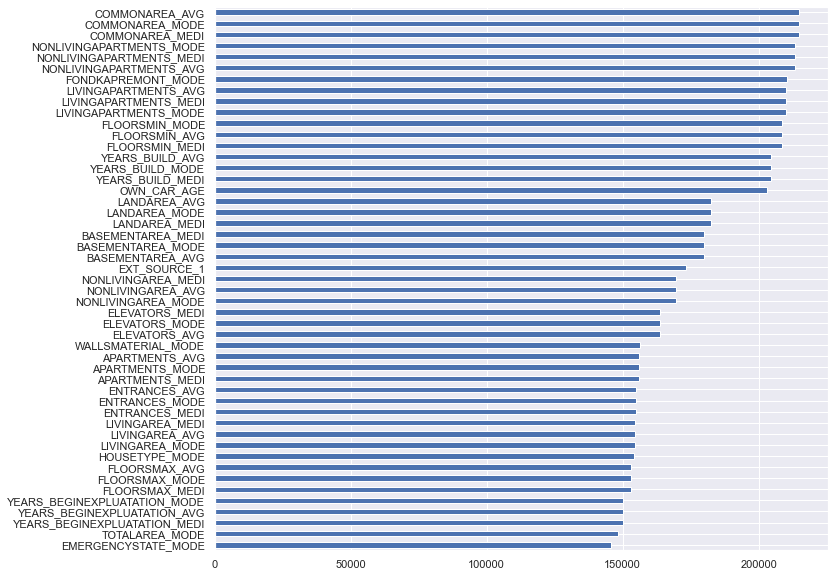

In [11]:
# ploting bar for  the columns having null value percentage morethan 40%

plt.figure(figsize=[11,10])

app_data[col_name].isna().sum().sort_values(ascending=True).plot(kind='barh');

In [12]:
# Droping columns having morethan 40% null values

app_data.drop(col_name,axis=1,inplace=True)

In [13]:
# Checking shape after the removal of columns

app_data.shape

(307511, 73)

In [14]:
#printing the less impacted column names using columns_description file 
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [15]:
# Removing columns which are not relatable for main scenarios or not much impact on meaningful insights

un_cols=['FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_POPULATION_RELATIVE','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','NAME_TYPE_SUITE','DAYS_ID_PUBLISH','DAYS_REGISTRATION']

len(un_cols)

39

In [16]:
# Dropping columns which are not relatable for main scenarios or not much impact on deriving meaningful insights

app_data.drop(un_cols,axis=1,inplace=True)

In [17]:
# Checking The shape of Data Frame

app_data.shape

(307511, 34)

In [18]:
#ReChecking the null value percentage
null_perc1=(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending=False)
print(null_perc1)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
NAME_INCOME_TYPE                0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
NAME_CONTRACT_TYPE              0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
TARGET                          0.000000
AMT_CREDIT                      0.000000
CODE_GENDER                     0.000000
DAYS_EMPLOYED                   0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYP

In [19]:
# Printing the Numerical columns

print(app_data.describe().columns)

num_cols=app_data.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


In [20]:
# Categorical columns

print(list(set(app_data.columns) - set(app_data.describe().columns)))

cat_cols=list(set(app_data.columns) - set(app_data.describe().columns))

['NAME_INCOME_TYPE', 'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'NAME_FAMILY_STATUS', 'WEEKDAY_APPR_PROCESS_START']


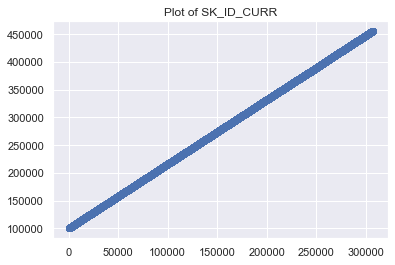

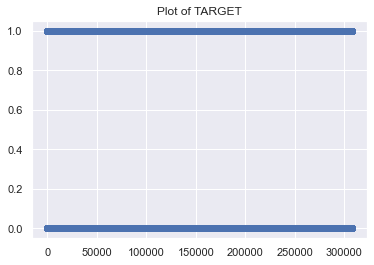

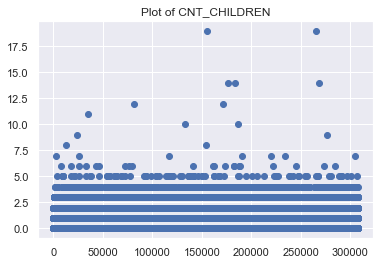

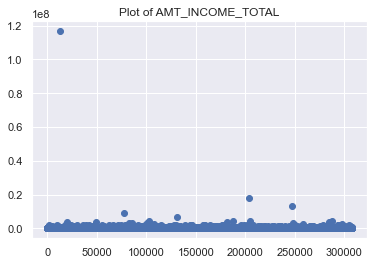

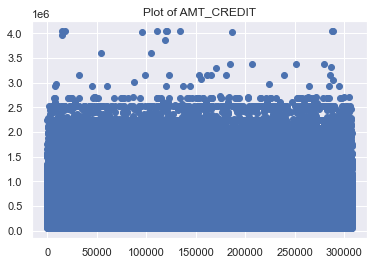

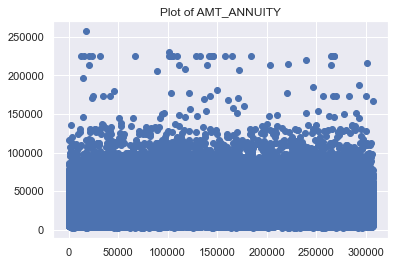

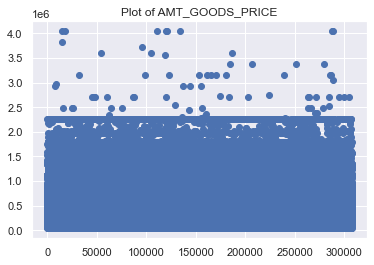

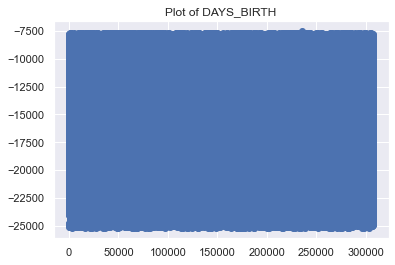

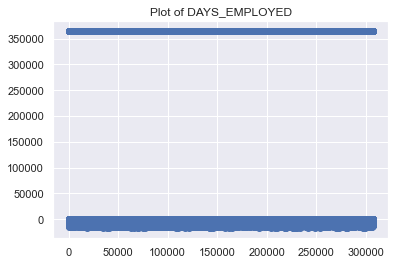

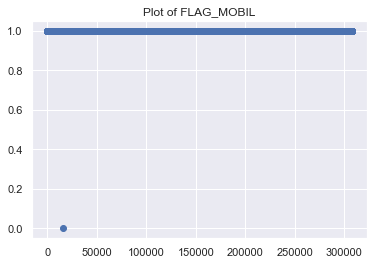

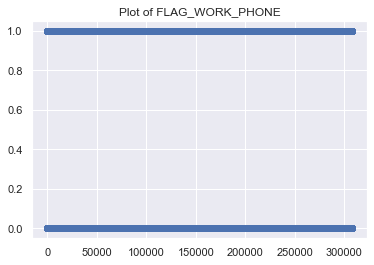

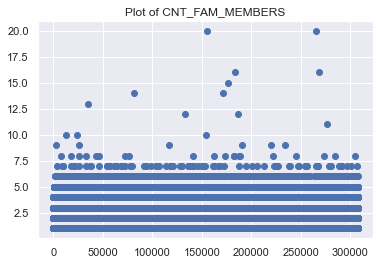

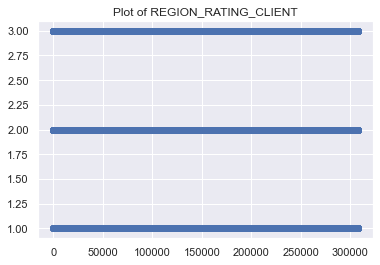

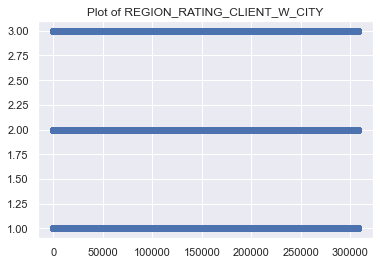

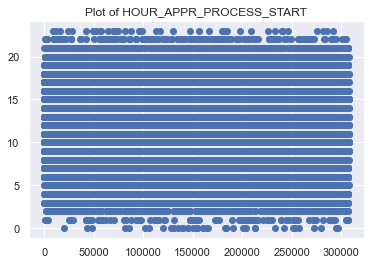

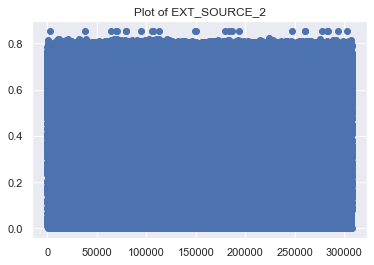

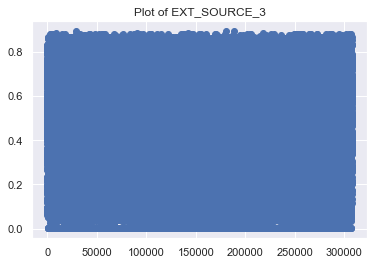

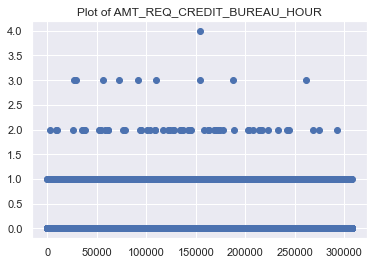

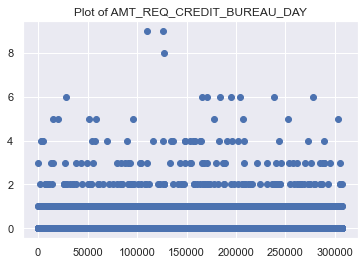

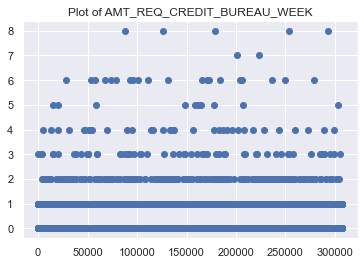

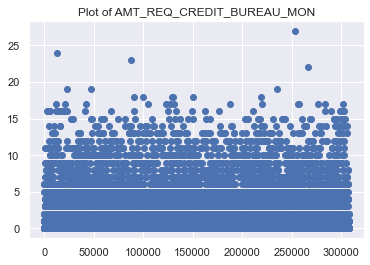

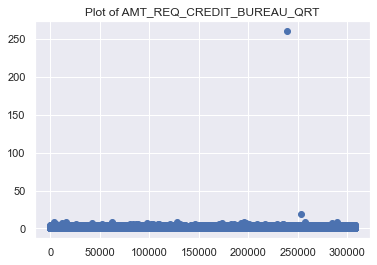

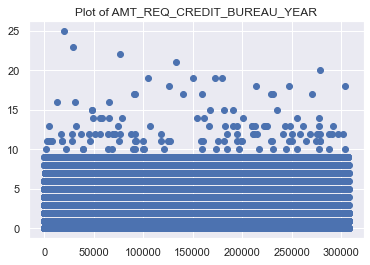

In [21]:
# Checking the Outliers for Numerical columns

for column in num_cols:
    plt.scatter(app_data.index, app_data[column])
    #plt.figure(figsize=[20,15])
    plt.title("Plot of "+column)
    plt.show();

In [22]:
# column names containing misisng data

nul_cols=app_data.columns[app_data.isna().any()].tolist()

print(nul_cols)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


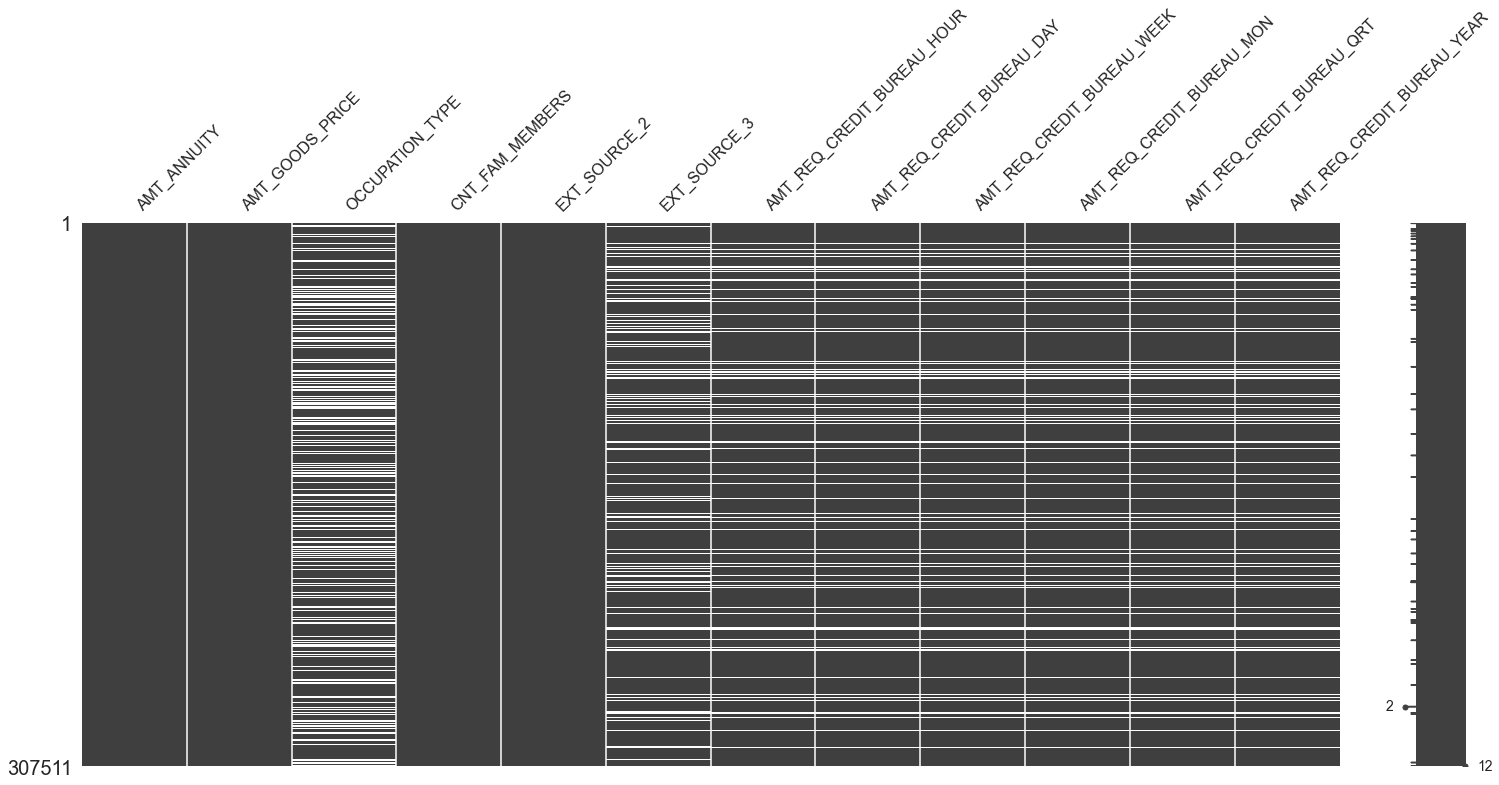

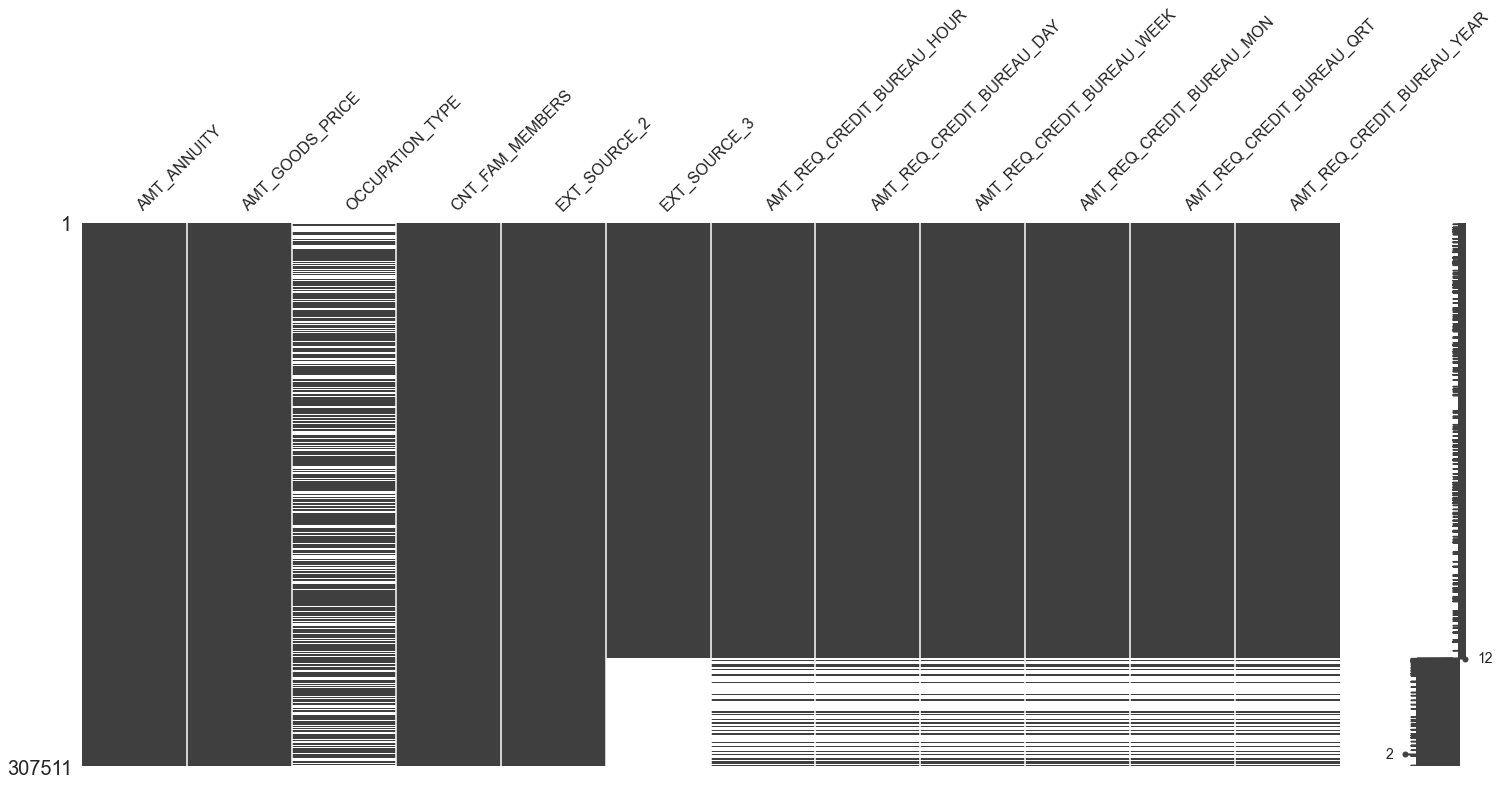

In [23]:
#Plotting the null value columns using msno
msno.matrix(app_data[nul_cols]);
msno.matrix(app_data[nul_cols].sort_values('EXT_SOURCE_3',ascending=False));
#After sorting w.r.t to EXT_SOURCE_3 column missing values are flown down

plt.savefig('matrix.png')

In [24]:
#Imputing data of following numerical columns with 0 as the mean and  median of all the columns iz zero so imputing columns with 0 with fillna method
med=app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median()
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)

In [25]:
#Imputing the field CNT_FAM_MEMBERS with median as the mean and median are very precise
medi=app_data['CNT_FAM_MEMBERS'].median()

app_data['CNT_FAM_MEMBERS'].fillna(medi, inplace=True)

In [26]:
#EXT_SOURCE_2
#Imputing values into AMT_ANNUITY numerical column with median as the mean and median for the column are very precise
medii=app_data['EXT_SOURCE_2'].median()
app_data['EXT_SOURCE_2'].fillna(medii, inplace=True)
app_data['EXT_SOURCE_2'].value_counts()

0.285898    721
0.565961    662
0.262258    417
0.265256    343
0.159679    322
           ... 
0.786006      1
0.256132      1
0.297243      1
0.226741      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [27]:
#EXT_SOURCE_3
#Imputing values into EXT_SOURCE_3 column with median as the mean and median for the column are very precise
medii=app_data['EXT_SOURCE_3'].median()
app_data['EXT_SOURCE_3'].fillna(medii, inplace=True)
app_data['EXT_SOURCE_3'].value_counts()

0.535276    61751
0.746300     1460
0.713631     1315
0.694093     1276
0.670652     1191
            ...  
0.018137        1
0.017017        1
0.858178        1
0.018924        1
0.024057        1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

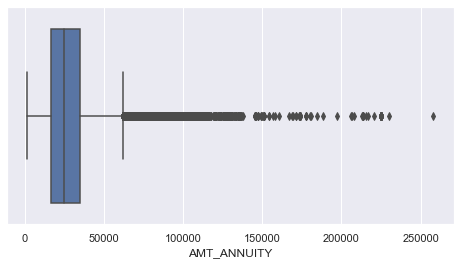

In [28]:
# Plotting to find if any outliers
plt.figure(figsize = (8,4) )
sns.boxplot(app_data['AMT_ANNUITY']);

Inferences drawn :
As we can see the annuity is having 0.004 almost negligible missing values and can be either deleted or imputed. Hence, we can follow either of the 2 approaches: delete the 12 rows having null values or try to impute as it will not hamper our analysis being very less in proportion compared to entire column. In case we want to impute: Since this column is having an outlier which is very large it will be inappropriate to impute missing values with mean, so Median comes to rescue for this and we can fill those missing values with median.

In [29]:
#AMT_GOODS_PRICE
#Imputing values into AMT_GOODS_PRICE column with median
app_data['AMT_GOODS_PRICE'].fillna(app_data['AMT_GOODS_PRICE'].median(), inplace=True)

In [30]:
#CODE_GENDER-

app_data['CODE_GENDER'] = app_data['CODE_GENDER'].apply(lambda x:x.replace('XNA','F'))

In [31]:
#ORGANIZATION_TYPE

app_data['ORGANIZATION_TYPE'] = app_data['ORGANIZATION_TYPE'].apply(lambda x:x.replace('XNA','Other'))

In [32]:
app_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
FLAG_MOBIL                         0
FLAG_WORK_PHONE                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                       0
E

In [33]:
#Checking the null values in Occupation Type
app_data['OCCUPATION_TYPE'].isnull().sum()/len(app_data)*100

31.345545362604916

# Inferences: Around 31% people have not provide the data of their occupation type, majority of the occupation type in this dataframe is Laborers then comes Sales staff followed by Core staff.
As the occupation type can be anything other than all the occupations provided in this column, so imputing this column can hamper our analysis.
It will be better to retain missing values rather than exaggerating the existing values.

## Converting Data Types to Required format

In [34]:
#Convert all the necessary datatypes into categories

app_data['NAME_CONTRACT_TYPE'] = app_data['NAME_CONTRACT_TYPE'].astype('category')
app_data['CODE_GENDER'] = app_data['CODE_GENDER'].astype('category')
app_data['FLAG_OWN_CAR'] = app_data['FLAG_OWN_CAR'].astype('category')
app_data['FLAG_OWN_REALTY'] = app_data['FLAG_OWN_REALTY'].astype('category')
app_data['NAME_INCOME_TYPE'] = app_data['NAME_INCOME_TYPE'].astype('category')
app_data['NAME_FAMILY_STATUS'] = app_data['NAME_FAMILY_STATUS'].astype('category')
app_data['NAME_HOUSING_TYPE'] = app_data['NAME_HOUSING_TYPE'].astype('category')
app_data['NAME_EDUCATION_TYPE'] = app_data['NAME_EDUCATION_TYPE'].astype('category')
app_data['OCCUPATION_TYPE'] = app_data['OCCUPATION_TYPE'].astype('category')
app_data['ORGANIZATION_TYPE'] = app_data['ORGANIZATION_TYPE'].astype('category')
app_data['WEEKDAY_APPR_PROCESS_START'] = app_data['WEEKDAY_APPR_PROCESS_START'].astype('category')
      

In [35]:
#Convert all the necessary datatypes into numeric
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype('int')
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('int')
app_data['AMT_REQ_CREDIT_BUREAU_DAY'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('int')
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('int')
app_data['AMT_REQ_CREDIT_BUREAU_MON'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('int')
app_data['AMT_REQ_CREDIT_BUREAU_QRT'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('int')
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('int')


In [36]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   FLAG_MOBIL  FLAG_WORK_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0           1                0        Laborers                1   
1           1                0      Core staff                2   
2           1                1        Laborers                1   
3           1                0        Laborers                2   
4           1                0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY                       10  Business Entity Type 3   
1                     MONDAY                       11                  School   
2                     MONDAY                        9              Government   
3                  WEDNESDAY                       17  Business Entity Type 3   
4                   THURSDAY                       11                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0      0.262949      0.139376                           0   
1      0.622246      0.535276                           0   
2      0.555912      0.729567                           0   
3      0.650442      0.535276                           0   
4      0.322738      0.535276                           0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4        

In [37]:
def calculate_years(x):
        born = date.today()-timedelta(days=-x)
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [38]:
app_data['DAYS_BIRTH']= app_data['DAYS_BIRTH'].apply(calculate_years)

app_data=app_data.rename(columns={'DAYS_BIRTH':'AGE'})

In [39]:
#Creation of continous columns in to segmented columns for the column DAYS_BIRTH

bins = [0,20, 30, 40, 50, 60, np.inf]
names = ['0-20','20-30', '30-40', '40-50', '50-60', '60+']

app_data['AGE_GROUP'] = pd.cut(app_data['AGE'], bins, labels=names)

print(app_data['AGE_GROUP'].head())

0    20-30
1    40-50
2    50-60
3    50-60
4    50-60
Name: AGE_GROUP, dtype: category
Categories (6, object): ['0-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60+']


In [40]:

#Creation of continous columns in to segmented columns for the column AMT_INCOME_TOTAL
bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,
      400000,425000,450000,475000,500000,1000000000]
labels=['0-25k','25k-50k','50k-75k','75k,100k','100k-125k','125k-150k','150k-175k',
        '175k-200k','200k-225k','225k-250k','250k-275k','275k-300k','300k-325k',
        '325k-350k','350k-375k','375k-400k','400k-425k','425k-450k','450k-475k',
        '475k-500k','500k+']

app_data['Income_range'] = pd.cut(app_data['AMT_INCOME_TOTAL'],bins=bins,labels=labels)

app_data[['Income_range','AMT_INCOME_TOTAL']].head()

Income_range  AMT_INCOME_TOTAL
0    200k-225k          202500.0
1    250k-275k          270000.0
2      50k-75k           67500.0
3    125k-150k          135000.0
4    100k-125k          121500.0

In [41]:

#Creation of continous columns in to segmented columns for the column AMT_CREDIT
bins=[0,300000,600000,900000,1200000,1500000,1800000,2100000,2400000,2700000,3000000,3300000,3600000,3900000,4200000]
labels=['0-3L','3L-6L','6L-9L','9L-12L','12L-15L','15L-18L','18L-21L','21L-24L','24L-27L','27L-30L','30L-33L','33L-36L','36L-39L','39L+']

app_data['Credit_range'] = pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=labels)

app_data[['Credit_range','AMT_CREDIT']].head()

Credit_range  AMT_CREDIT
0        3L-6L    406597.5
1      12L-15L   1293502.5
2         0-3L    135000.0
3        3L-6L    312682.5
4        3L-6L    513000.0

In [42]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE  DAYS_EMPLOYED  FLAG_MOBIL  \
0  Single / not married  House / apartment   25           -637           1   
1               Married  House / apartment   45          -1188           1   
2  Single / not married  House / apartment   52           -225           1   
3        Civil marriage  House / apartment   52          -3039           1   
4  Single / not married  House / apartment   54          -3038           1   

   FLAG_WORK_PHONE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                0        Laborers                1                     2   
1                0      Core staff                2                     1   
2                1        Laborers                1                     2   
3                0        Laborers                2                     2   
4                0      Core staff                1                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                       10  Business Entity Type 3      0.262949   
1                       11                  School      0.622246   
2                        9              Government      0.555912   
3                       17  Business Entity Type 3      0.650442   
4                       11                Religion      0.322738   

   EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0      0.139376                           0                          0   
1      0.535276                           0                          0   
2      0.729567                           0                          0   
3      0.535276                           0                          0   
4      0.535276                           0                          0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AGE_GROUP  \
0                          0                           0     20-30   
1                          0                

In [43]:
# Since there is a lot of dataimbalance,categorise the dataframe as following
tar_0 = app_data.loc[app_data['TARGET'] == 0]
tar_1 = app_data.loc[app_data['TARGET'] == 1]

In [44]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(tar_0)/len(tar_1),2)

11.39

In [45]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

Plotting  NAME_INCOME_TYPE


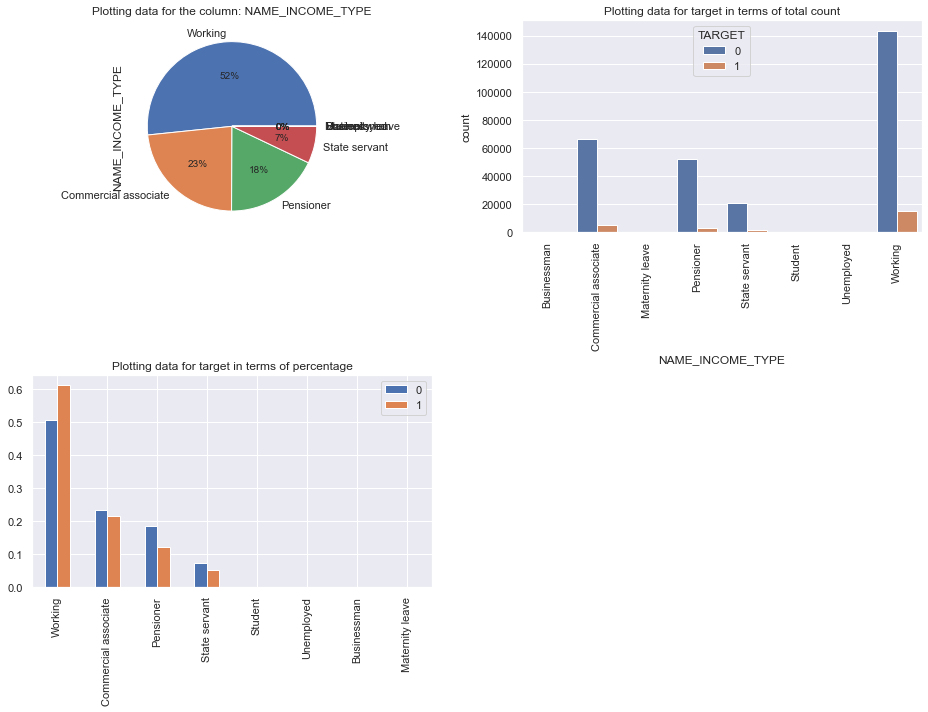

Plotting  FLAG_OWN_CAR


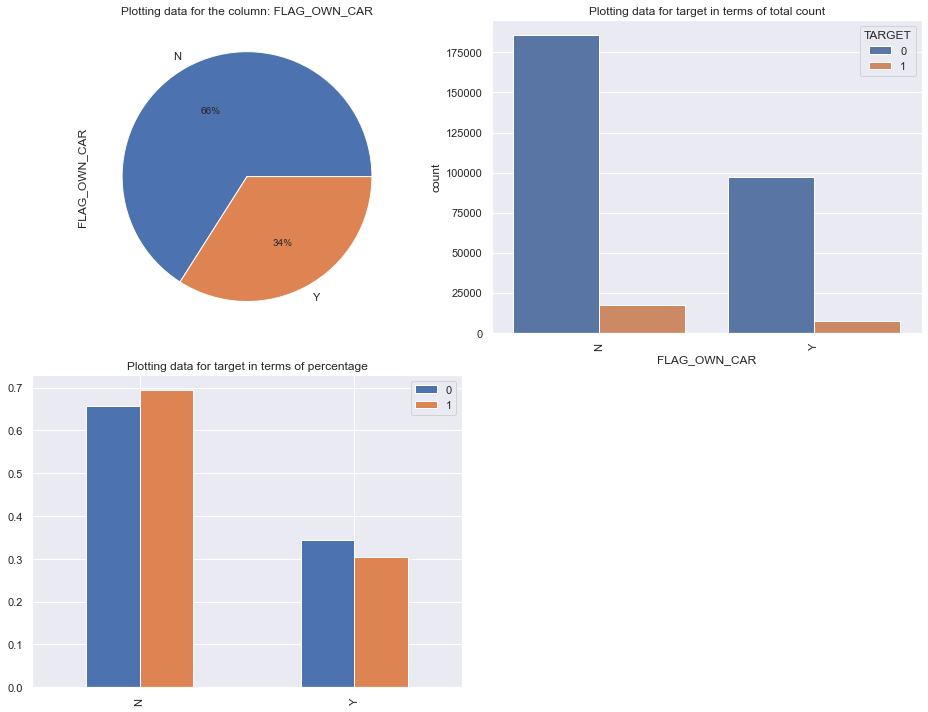

Plotting  NAME_EDUCATION_TYPE


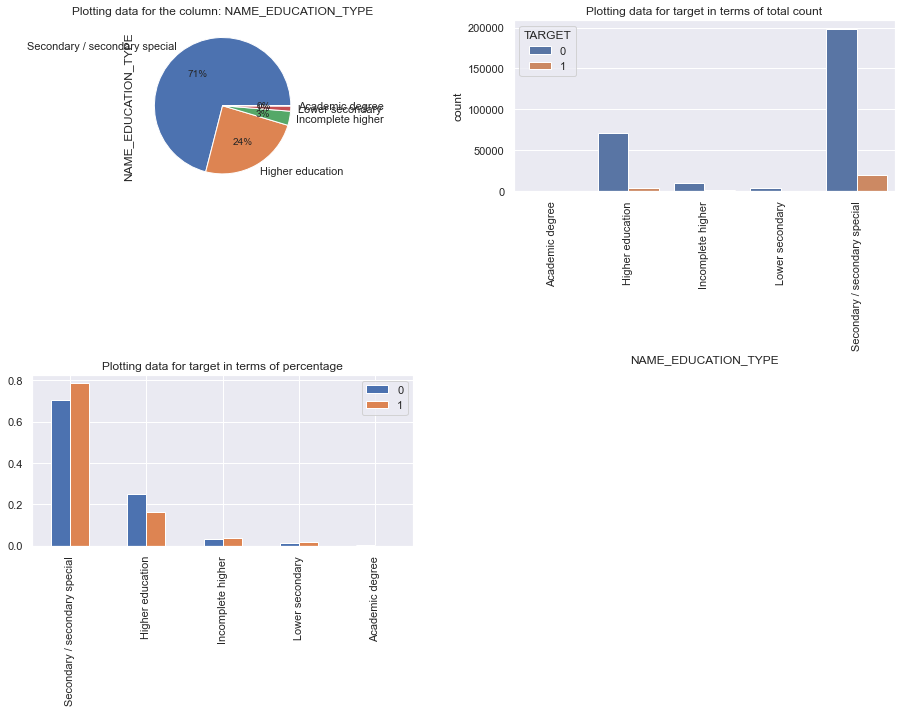

Plotting  CODE_GENDER


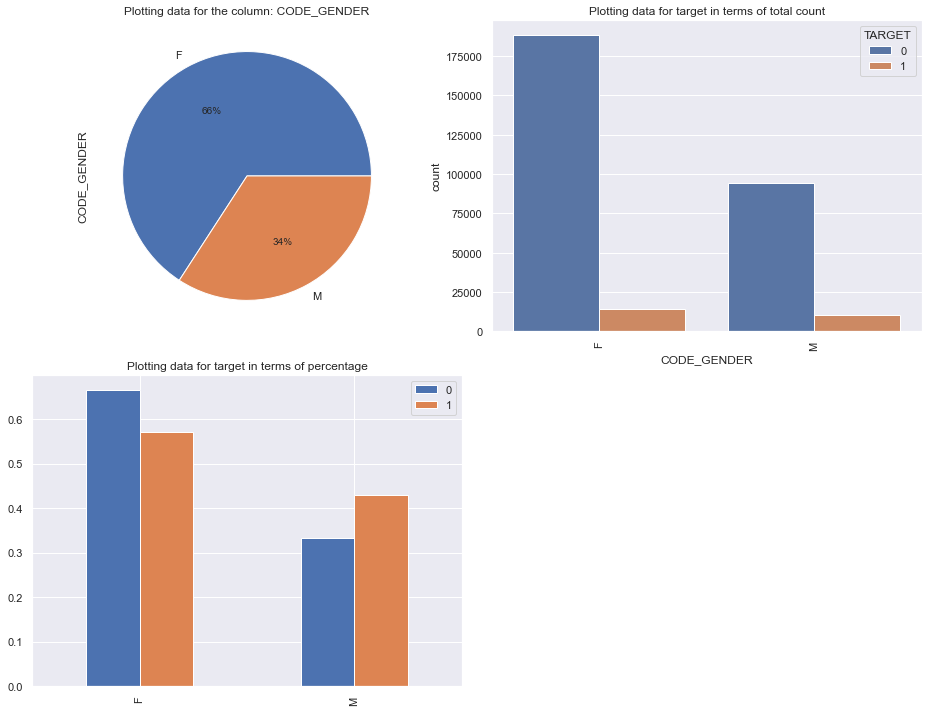

Plotting  FLAG_OWN_REALTY


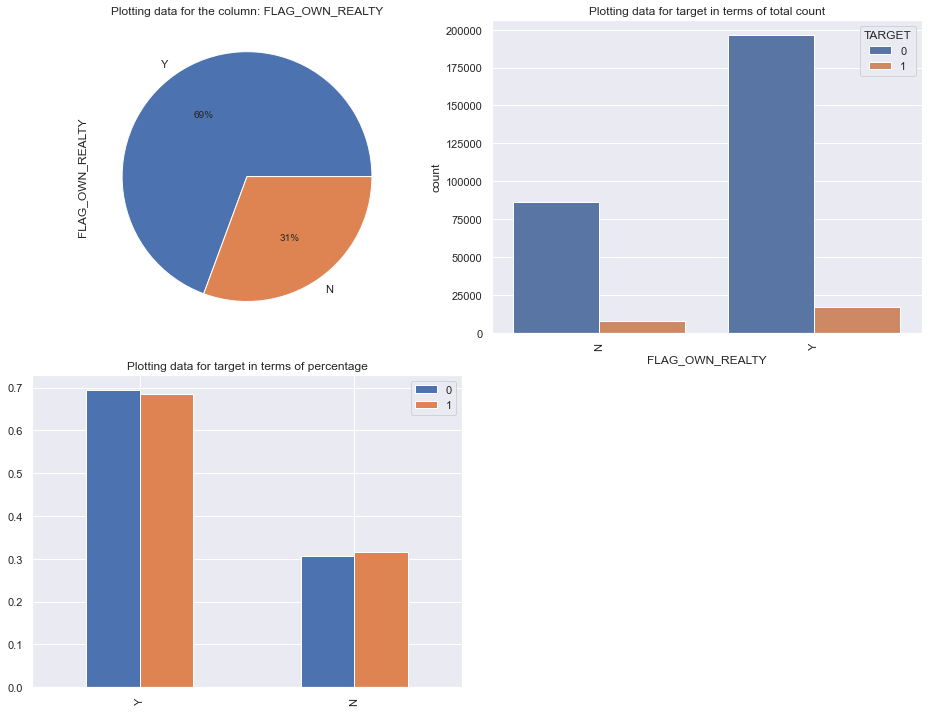

Plotting  OCCUPATION_TYPE


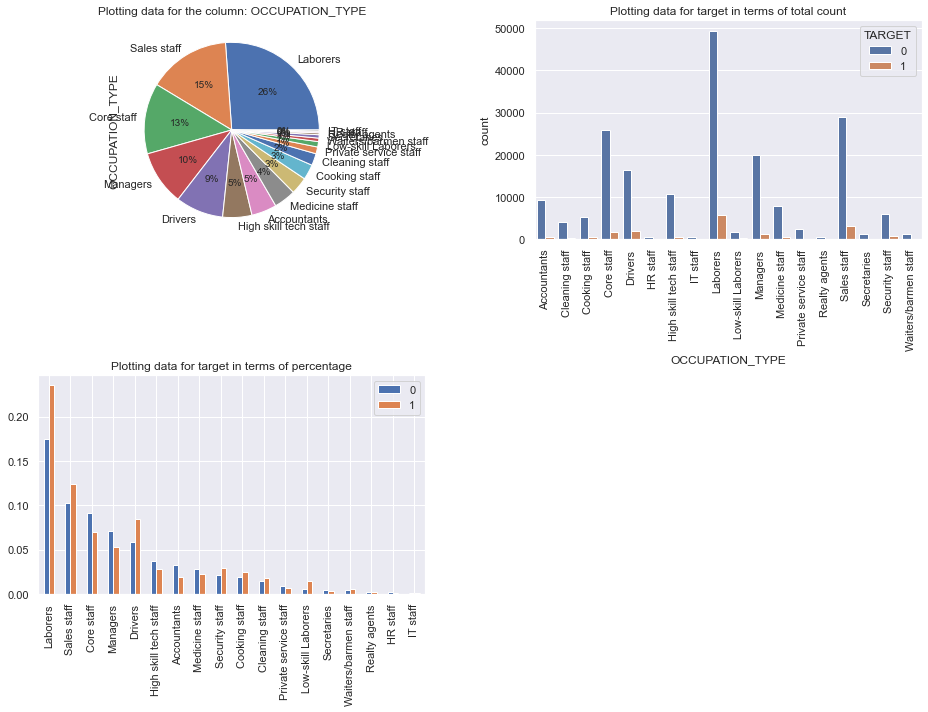

Plotting  NAME_CONTRACT_TYPE


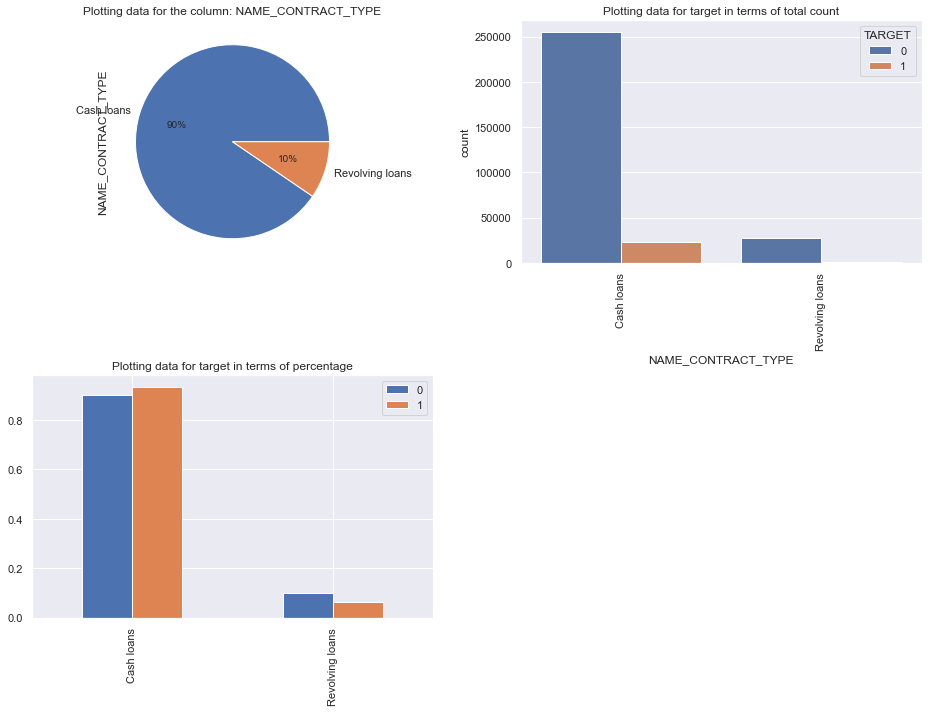

Plotting  NAME_HOUSING_TYPE


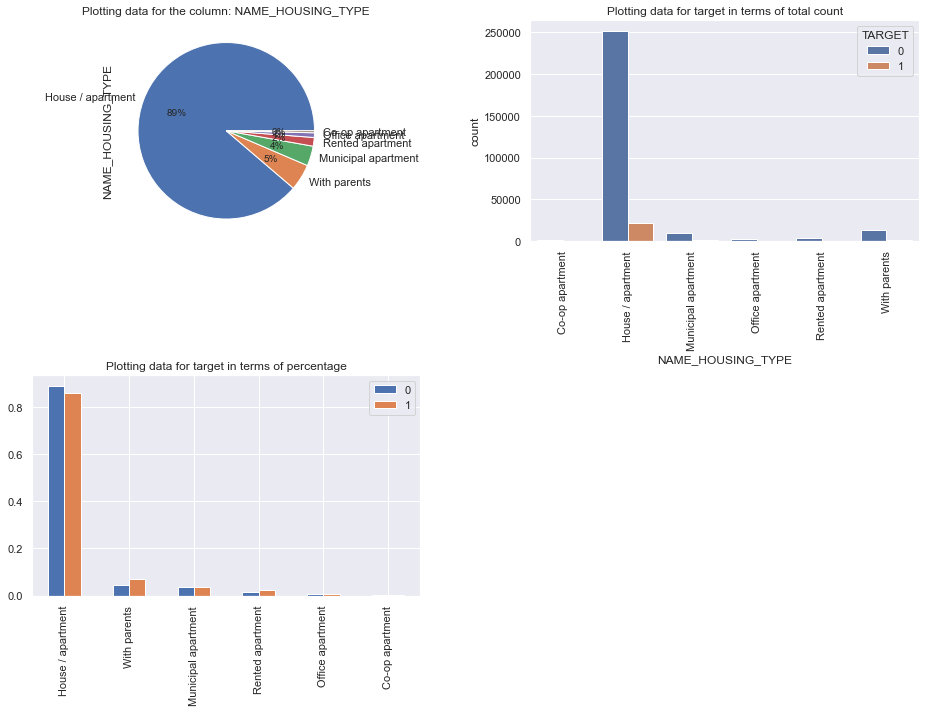

Plotting  ORGANIZATION_TYPE


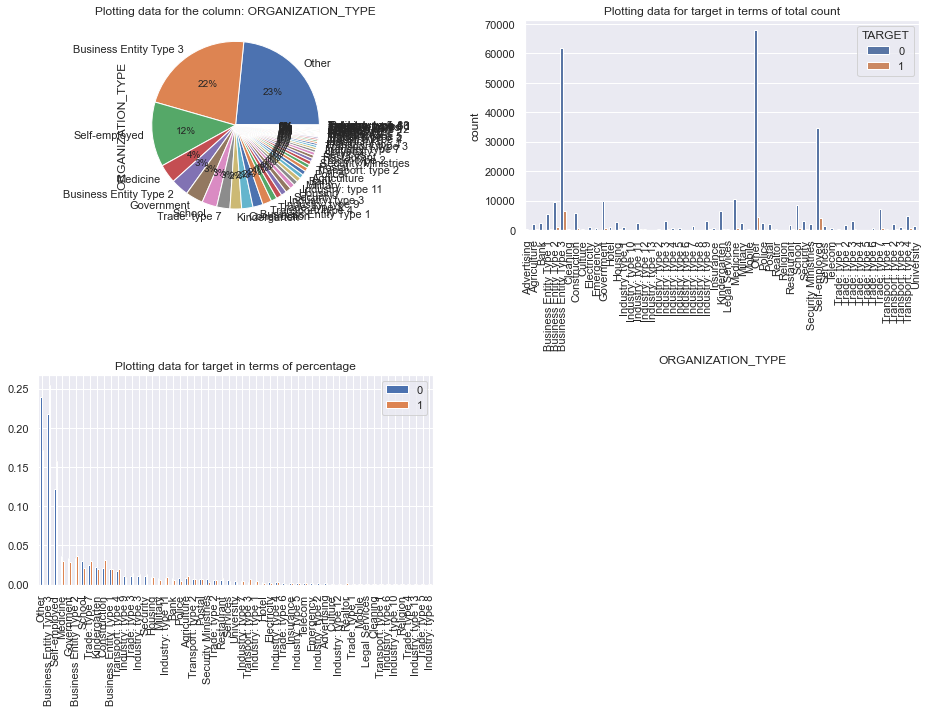

Plotting  NAME_FAMILY_STATUS


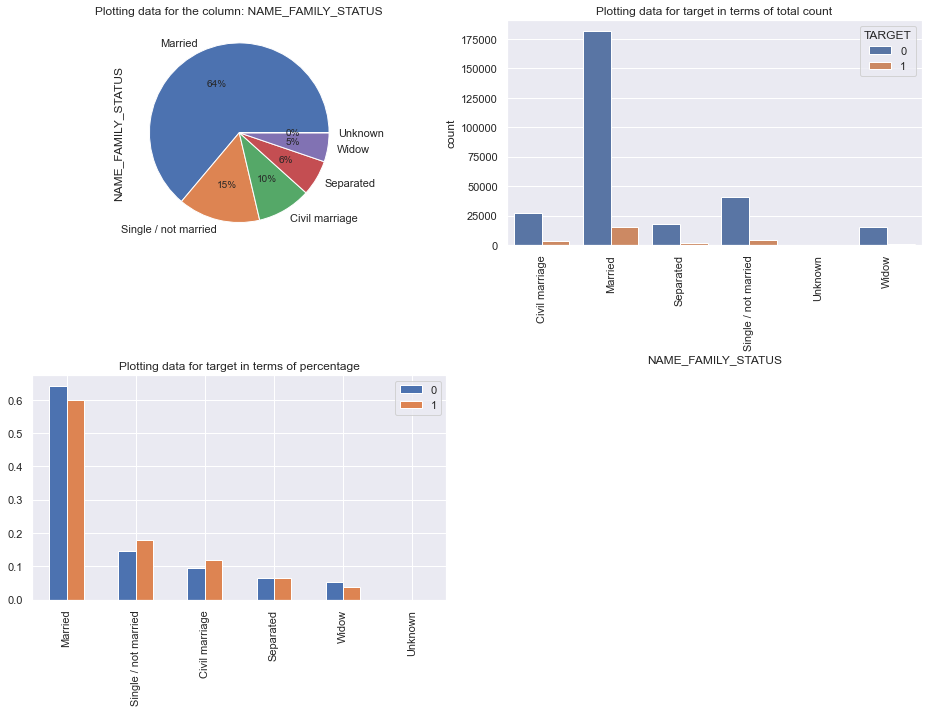

Plotting  WEEKDAY_APPR_PROCESS_START


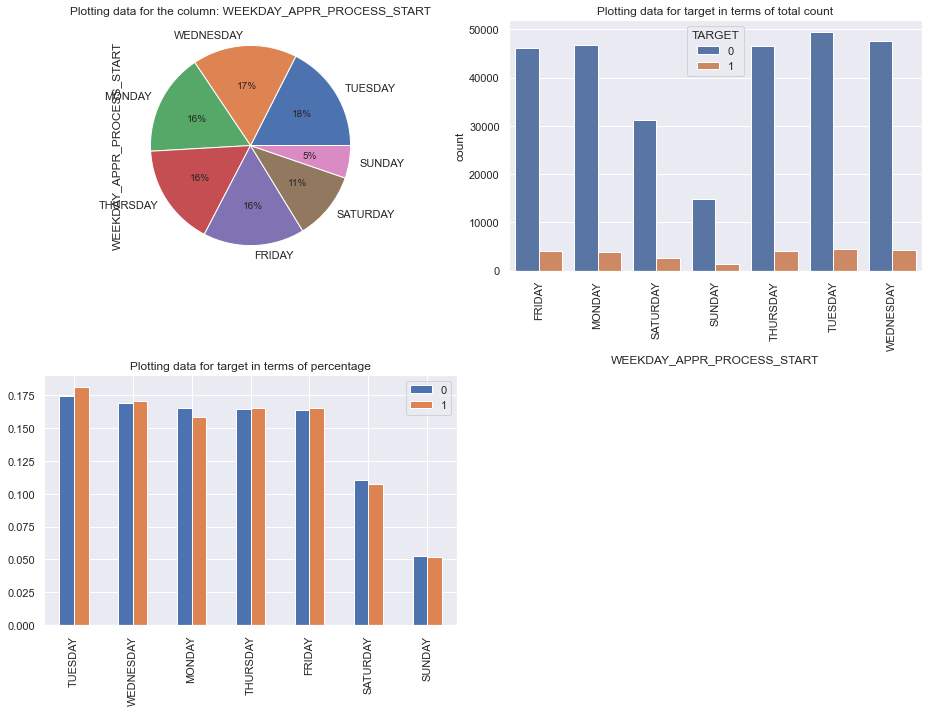

In [46]:
#Univariate Analysis for Categorical Columns
for column in cat_cols:
    print("Plotting ", column)
    plotting(app_data,tar_0, tar_1, column)

In [47]:
#Univariate Analysis for Numerical columns
num_cols=app_data.select_dtypes(include=['int64','float64']).columns

print(num_cols)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AGE', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'EXT_SOURCE_3'],
      dtype='object')


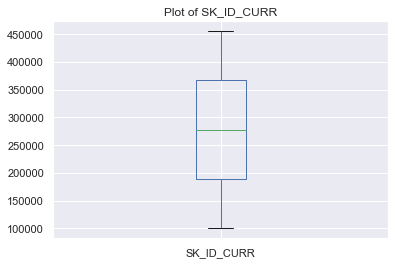

<Figure size 720x576 with 0 Axes>

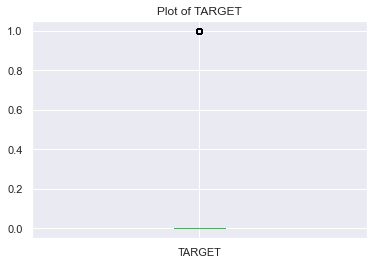

<Figure size 720x576 with 0 Axes>

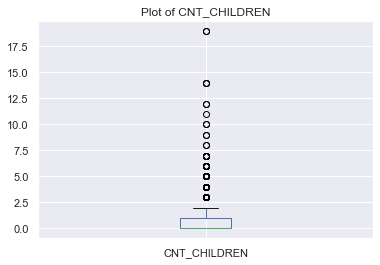

<Figure size 720x576 with 0 Axes>

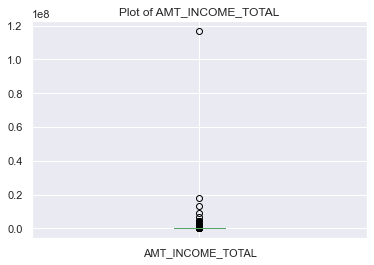

<Figure size 720x576 with 0 Axes>

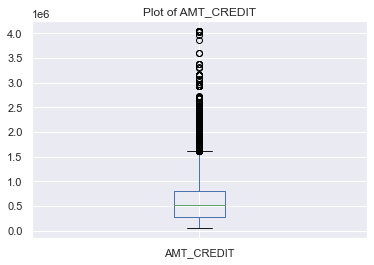

<Figure size 720x576 with 0 Axes>

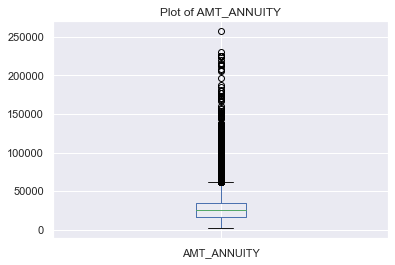

<Figure size 720x576 with 0 Axes>

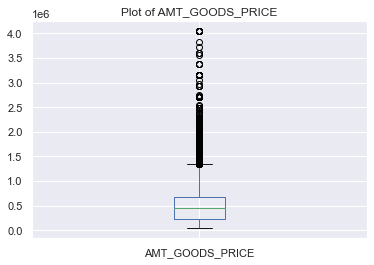

<Figure size 720x576 with 0 Axes>

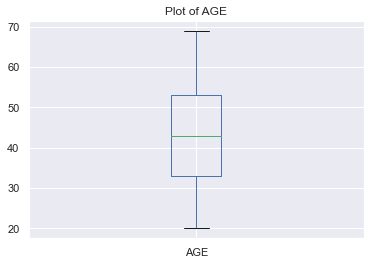

<Figure size 720x576 with 0 Axes>

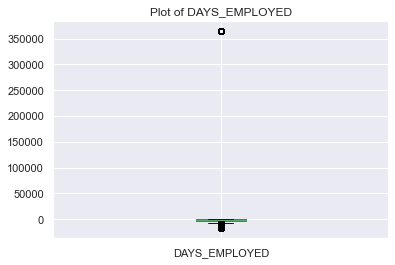

<Figure size 720x576 with 0 Axes>

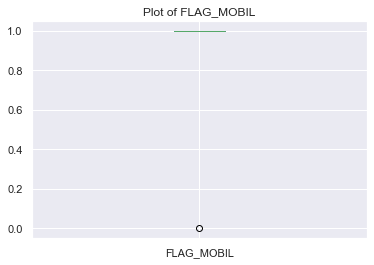

<Figure size 720x576 with 0 Axes>

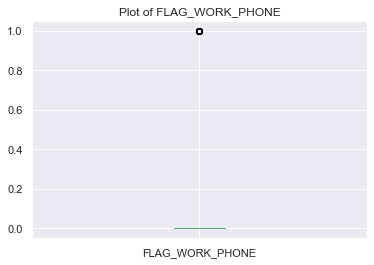

<Figure size 720x576 with 0 Axes>

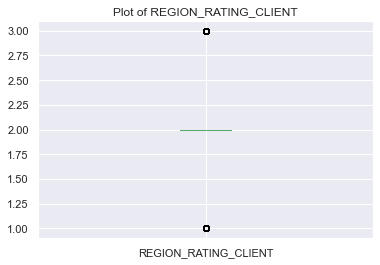

<Figure size 720x576 with 0 Axes>

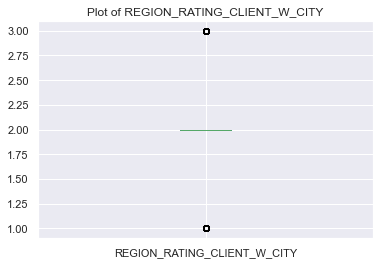

<Figure size 720x576 with 0 Axes>

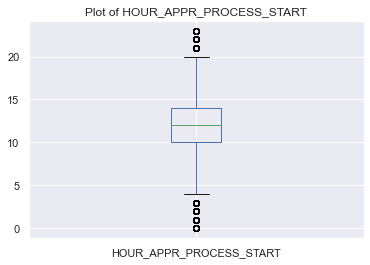

<Figure size 720x576 with 0 Axes>

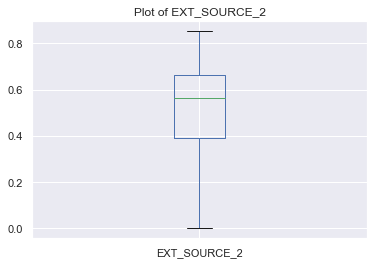

<Figure size 720x576 with 0 Axes>

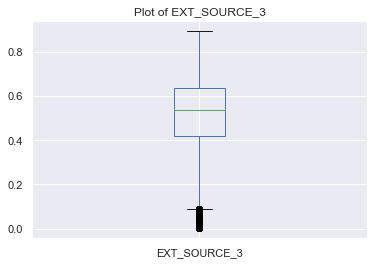

<Figure size 720x576 with 0 Axes>

In [48]:
#Univariate Analysis for Numerical columns
for column in num_cols:
    app_data[column].plot.box()
    plt.title("Plot of "+column)
    plt.figure(figsize=[10,8])
    plt.show();

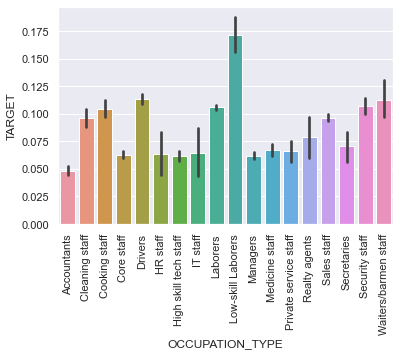

In [49]:

#app_data.groupby('OCCUPATION_TYPE').TARGET.mean()
#Plotting a barplot to get more insights
#Low skilled labour are facing more difficulties to pay the loan
sns.barplot(data=app_data,x=app_data['OCCUPATION_TYPE'],y='TARGET');
plt.xticks(rotation=90);
plt.show()

In [50]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

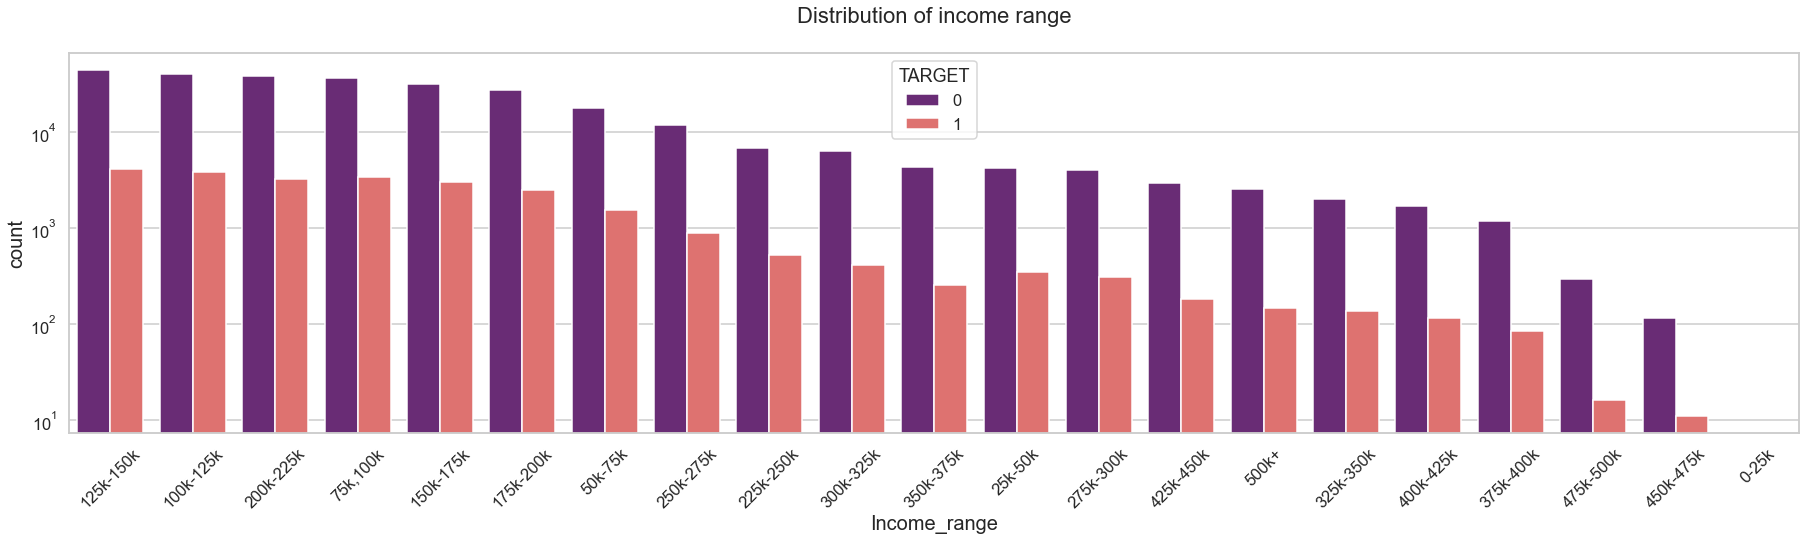

In [51]:
#PLotting for income range

uniplot(app_data,col='Income_range',title='Distribution of income range',hue='TARGET')

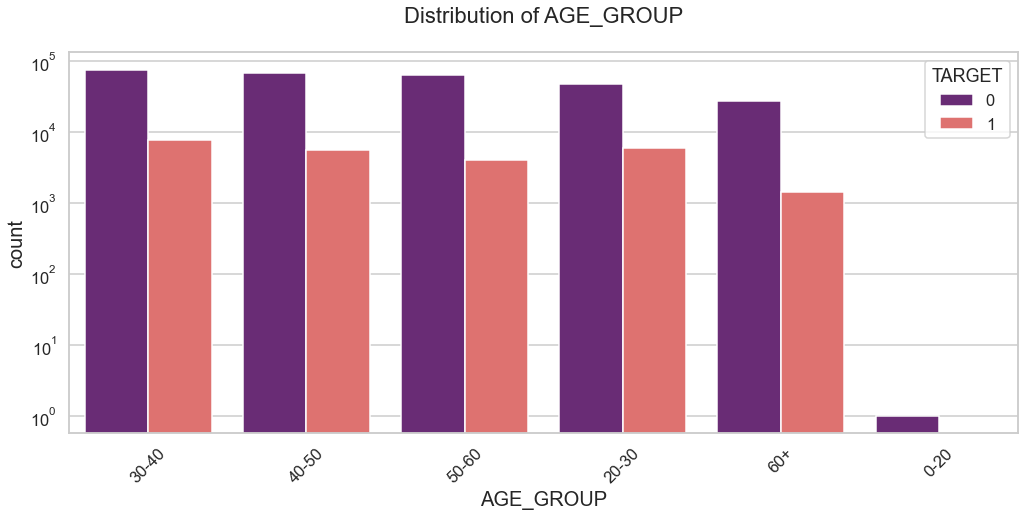

In [52]:
#PLotting for AGE_GROUP range

uniplot(app_data,col='AGE_GROUP',title='Distribution of AGE_GROUP',hue='TARGET')

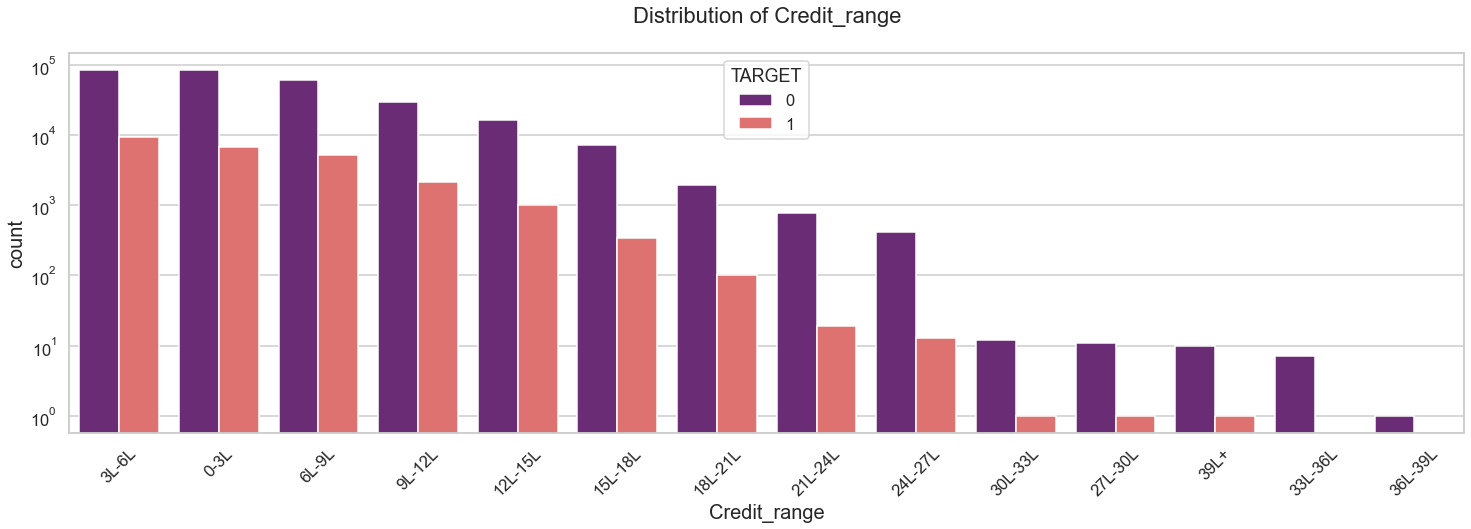

In [53]:
#PLotting for Credit_range range

uniplot(app_data,col='Credit_range',title='Distribution of Credit_range',hue='TARGET')

# CORRE()

In [54]:
app_data.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.002108     -0.001129   
TARGET                        -0.002108  1.000000      0.019187   
CNT_CHILDREN                  -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL              -0.001820 -0.003982      0.012882   
AMT_CREDIT                    -0.000343 -0.030369      0.002145   
AMT_ANNUITY                   -0.000433 -0.012817      0.021374   
AMT_GOODS_PRICE               -0.000258 -0.039623     -0.001856   
AGE                            0.001440 -0.078198     -0.330876   
DAYS_EMPLOYED                  0.001366 -0.044932     -0.239818   
FLAG_MOBIL                     0.002804  0.000534      0.001041   
FLAG_WORK_PHONE               -0.000415  0.028524      0.055630   
CNT_FAM_MEMBERS               -0.002895  0.009308      0.879160   
REGION_RATING_CLIENT          -0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY   -0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START        0.000350 -0.024166     -0.007292   
EXT_SOURCE_2                   0.002319 -0.160295     -0.017990   
EXT_SOURCE_3                   0.000184 -0.155892     -0.039543   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.002517 -0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_DAY     -0.002517 -0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_WEEK    -0.002517 -0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_MON     -0.002517 -0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_QRT     -0.002517 -0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_YEAR    -0.002517 -0.000074      0.000159   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          -0.001820   -0.000343    -0.000433   
TARGET                              -0.003982   -0.030369    -0.012817   
CNT_CHILDREN                         0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                     1.000000    0.156870     0.191657   
AMT_CREDIT                           0.156870    1.000000     0.770138   
AMT_ANNUITY                          0.191657    0.770138     1.000000   
AMT_GOODS_PRICE                      0.159632    0.986734     0.774848   
AGE                                 -0.027270    0.055462    -0.009450   
DAYS_EMPLOYED                       -0.064223   -0.066838    -0.104332   
FLAG_MOBIL                           0.000325    0.001436     0.000149   
FLAG_WORK_PHONE                     -0.017193   -0.021085    -0.024803   
CNT_FAM_MEMBERS                      0.016341    0.063160     0.075539   
REGION_RATING_CLIENT                -0.085465   -0.101776    -0.128525   
REGION_RATING_CLIENT_W_CITY         -0.091735   -0.110915    -0.141682   
HOUR_APPR_PROCESS_START              0.036459    0.052738     0.052269   
EXT_SOURCE_2                         0.060855    0.130930     0.125513   
EXT_SOURCE_3                        -0.030737    0.036640     0.026735   
AMT_REQ_CREDIT_BUREAU_HOUR           0.001432   -0.002366     0.003888   
AMT_REQ_CREDIT_BUREAU_DAY            0.001432   -0.002366     0.003888   
AMT_REQ_CREDIT_BUREAU_WEEK           0.001432   -0.002366     0.003888   
AMT_REQ_CREDIT_BUREAU_MON            0.001432   -0.002366     0.003888   
AMT_REQ_CREDIT_BUREAU_QRT            0.001432   -0.002366     0.003888   
AMT_REQ_CREDIT_BUREAU_YEAR           0.001432   -0.002366     0.003888   

                             AMT_GOODS_PRICE       AGE  DAYS_EMPLOYED  \
SK_ID_CURR                         -0.000258  0.001440       0.001366   
TARGET                             -0.039623 -0.078198      -0.044932   
CNT_CHILDREN                       -0.001856 -0.330876      -0.239818   
AMT_INCOME_TOTAL                    0.159632 -0.027270      -0.064223   
AMT_CREDIT                          0.986734  0.055462      -0.066838   
AMT_ANNUITY                         0.774848 -0.009450      -0.104332   
AMT_GOODS_PRICE                     1.000000  0.053532      -0.064767   
AGE                                 0.053532  1.000000     

In [55]:
app_data.corr().shape

(23, 23)

In [56]:
app_data.corr().abs()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000  0.002108      0.001129   
TARGET                         0.002108  1.000000      0.019187   
CNT_CHILDREN                   0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL               0.001820  0.003982      0.012882   
AMT_CREDIT                     0.000343  0.030369      0.002145   
AMT_ANNUITY                    0.000433  0.012817      0.021374   
AMT_GOODS_PRICE                0.000258  0.039623      0.001856   
AGE                            0.001440  0.078198      0.330876   
DAYS_EMPLOYED                  0.001366  0.044932      0.239818   
FLAG_MOBIL                     0.002804  0.000534      0.001041   
FLAG_WORK_PHONE                0.000415  0.028524      0.055630   
CNT_FAM_MEMBERS                0.002895  0.009308      0.879160   
REGION_RATING_CLIENT           0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY    0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START        0.000350  0.024166      0.007292   
EXT_SOURCE_2                   0.002319  0.160295      0.017990   
EXT_SOURCE_3                   0.000184  0.155892      0.039543   
AMT_REQ_CREDIT_BUREAU_HOUR     0.002517  0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_DAY      0.002517  0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_WEEK     0.002517  0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_MON      0.002517  0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_QRT      0.002517  0.000074      0.000159   
AMT_REQ_CREDIT_BUREAU_YEAR     0.002517  0.000074      0.000159   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                           0.001820    0.000343     0.000433   
TARGET                               0.003982    0.030369     0.012817   
CNT_CHILDREN                         0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                     1.000000    0.156870     0.191657   
AMT_CREDIT                           0.156870    1.000000     0.770138   
AMT_ANNUITY                          0.191657    0.770138     1.000000   
AMT_GOODS_PRICE                      0.159632    0.986734     0.774848   
AGE                                  0.027270    0.055462     0.009450   
DAYS_EMPLOYED                        0.064223    0.066838     0.104332   
FLAG_MOBIL                           0.000325    0.001436     0.000149   
FLAG_WORK_PHONE                      0.017193    0.021085     0.024803   
CNT_FAM_MEMBERS                      0.016341    0.063160     0.075539   
REGION_RATING_CLIENT                 0.085465    0.101776     0.128525   
REGION_RATING_CLIENT_W_CITY          0.091735    0.110915     0.141682   
HOUR_APPR_PROCESS_START              0.036459    0.052738     0.052269   
EXT_SOURCE_2                         0.060855    0.130930     0.125513   
EXT_SOURCE_3                         0.030737    0.036640     0.026735   
AMT_REQ_CREDIT_BUREAU_HOUR           0.001432    0.002366     0.003888   
AMT_REQ_CREDIT_BUREAU_DAY            0.001432    0.002366     0.003888   
AMT_REQ_CREDIT_BUREAU_WEEK           0.001432    0.002366     0.003888   
AMT_REQ_CREDIT_BUREAU_MON            0.001432    0.002366     0.003888   
AMT_REQ_CREDIT_BUREAU_QRT            0.001432    0.002366     0.003888   
AMT_REQ_CREDIT_BUREAU_YEAR           0.001432    0.002366     0.003888   

                             AMT_GOODS_PRICE       AGE  DAYS_EMPLOYED  \
SK_ID_CURR                          0.000258  0.001440       0.001366   
TARGET                              0.039623  0.078198       0.044932   
CNT_CHILDREN                        0.001856  0.330876       0.239818   
AMT_INCOME_TOTAL                    0.159632  0.027270       0.064223   
AMT_CREDIT                          0.986734  0.055462       0.066838   
AMT_ANNUITY                         0.774848  0.009450       0.104332   
AMT_GOODS_PRICE                     1.000000  0.053532       0.064767   
AGE                                 0.053532  1.000000     

In [57]:
app_data.corr().abs().unstack()

SK_ID_CURR                  SK_ID_CURR                    1.000000
                            TARGET                        0.002108
                            CNT_CHILDREN                  0.001129
                            AMT_INCOME_TOTAL              0.001820
                            AMT_CREDIT                    0.000343
                                                            ...   
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY     1.000000
                            AMT_REQ_CREDIT_BUREAU_WEEK    1.000000
                            AMT_REQ_CREDIT_BUREAU_MON     1.000000
                            AMT_REQ_CREDIT_BUREAU_QRT     1.000000
                            AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 529, dtype: float64

In [58]:
app_data.corr().abs().unstack().sort_values(kind='quicksort')

TARGET                      AMT_REQ_CREDIT_BUREAU_QRT     0.000074
AMT_REQ_CREDIT_BUREAU_DAY   TARGET                        0.000074
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                        0.000074
AMT_REQ_CREDIT_BUREAU_MON   TARGET                        0.000074
AMT_REQ_CREDIT_BUREAU_HOUR  TARGET                        0.000074
                                                            ...   
AMT_REQ_CREDIT_BUREAU_DAY   AMT_REQ_CREDIT_BUREAU_DAY     1.000000
                            AMT_REQ_CREDIT_BUREAU_HOUR    1.000000
AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
                            AMT_REQ_CREDIT_BUREAU_MON     1.000000
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 529, dtype: float64

In [59]:
app_data.corr().abs().unstack().sort_values(kind='quicksort').dropna()

TARGET                      AMT_REQ_CREDIT_BUREAU_QRT     0.000074
AMT_REQ_CREDIT_BUREAU_DAY   TARGET                        0.000074
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                        0.000074
AMT_REQ_CREDIT_BUREAU_MON   TARGET                        0.000074
AMT_REQ_CREDIT_BUREAU_HOUR  TARGET                        0.000074
                                                            ...   
AMT_REQ_CREDIT_BUREAU_DAY   AMT_REQ_CREDIT_BUREAU_DAY     1.000000
                            AMT_REQ_CREDIT_BUREAU_HOUR    1.000000
AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
                            AMT_REQ_CREDIT_BUREAU_MON     1.000000
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 529, dtype: float64

In [60]:
correlation_0=app_data.corr().abs().unstack().sort_values(kind='quicksort').dropna()
print(correlation_0)

TARGET                      AMT_REQ_CREDIT_BUREAU_QRT     0.000074
AMT_REQ_CREDIT_BUREAU_DAY   TARGET                        0.000074
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                        0.000074
AMT_REQ_CREDIT_BUREAU_MON   TARGET                        0.000074
AMT_REQ_CREDIT_BUREAU_HOUR  TARGET                        0.000074
                                                            ...   
AMT_REQ_CREDIT_BUREAU_DAY   AMT_REQ_CREDIT_BUREAU_DAY     1.000000
                            AMT_REQ_CREDIT_BUREAU_HOUR    1.000000
AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
                            AMT_REQ_CREDIT_BUREAU_MON     1.000000
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 529, dtype: float64


In [61]:
correlation_0=correlation_0[correlation_0!=1.0]
correlation_0

TARGET                       AMT_REQ_CREDIT_BUREAU_QRT      0.000074
AMT_REQ_CREDIT_BUREAU_DAY    TARGET                         0.000074
AMT_REQ_CREDIT_BUREAU_YEAR   TARGET                         0.000074
AMT_REQ_CREDIT_BUREAU_MON    TARGET                         0.000074
AMT_REQ_CREDIT_BUREAU_HOUR   TARGET                         0.000074
                                                              ...   
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.879160
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950842
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950842
AMT_CREDIT                   AMT_GOODS_PRICE                0.986734
AMT_GOODS_PRICE              AMT_CREDIT                     0.986734
Length: 476, dtype: float64

In [62]:
correlation_0_top10=correlation_0.tail(10)
correlation_0_top10

AMT_ANNUITY                  AMT_CREDIT                     0.770138
AMT_CREDIT                   AMT_ANNUITY                    0.770138
AMT_GOODS_PRICE              AMT_ANNUITY                    0.774848
AMT_ANNUITY                  AMT_GOODS_PRICE                0.774848
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.879160
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.879160
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950842
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950842
AMT_CREDIT                   AMT_GOODS_PRICE                0.986734
AMT_GOODS_PRICE              AMT_CREDIT                     0.986734
dtype: float64

In [63]:
correlation_1 = tar_0.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0 ]
correlation_1_top10=correlation_1.tail(10)
print(correlation_1_top10)


AMT_ANNUITY                  AMT_CREDIT                     0.771309
AMT_CREDIT                   AMT_ANNUITY                    0.771309
AMT_GOODS_PRICE              AMT_ANNUITY                    0.776433
AMT_ANNUITY                  AMT_GOODS_PRICE                0.776433
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
AMT_GOODS_PRICE              AMT_CREDIT                     0.987022
AMT_CREDIT                   AMT_GOODS_PRICE                0.987022
dtype: float64


In [64]:
correlation_2 = tar_1.corr().abs()
correlation_2 = correlation_2.unstack().sort_values(kind='quicksort')
correlation_2 = correlation_2.dropna()
correlation_2 = correlation_2[correlation_2 != 1.0 ]
correlation_2_top10=correlation_2.tail(10)

print(correlation_2_top10)

AMT_ANNUITY                  AMT_CREDIT                     0.752195
AMT_CREDIT                   AMT_ANNUITY                    0.752195
AMT_GOODS_PRICE              AMT_ANNUITY                    0.752295
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752295
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
AMT_GOODS_PRICE              AMT_CREDIT                     0.982783
AMT_CREDIT                   AMT_GOODS_PRICE                0.982783
dtype: float64


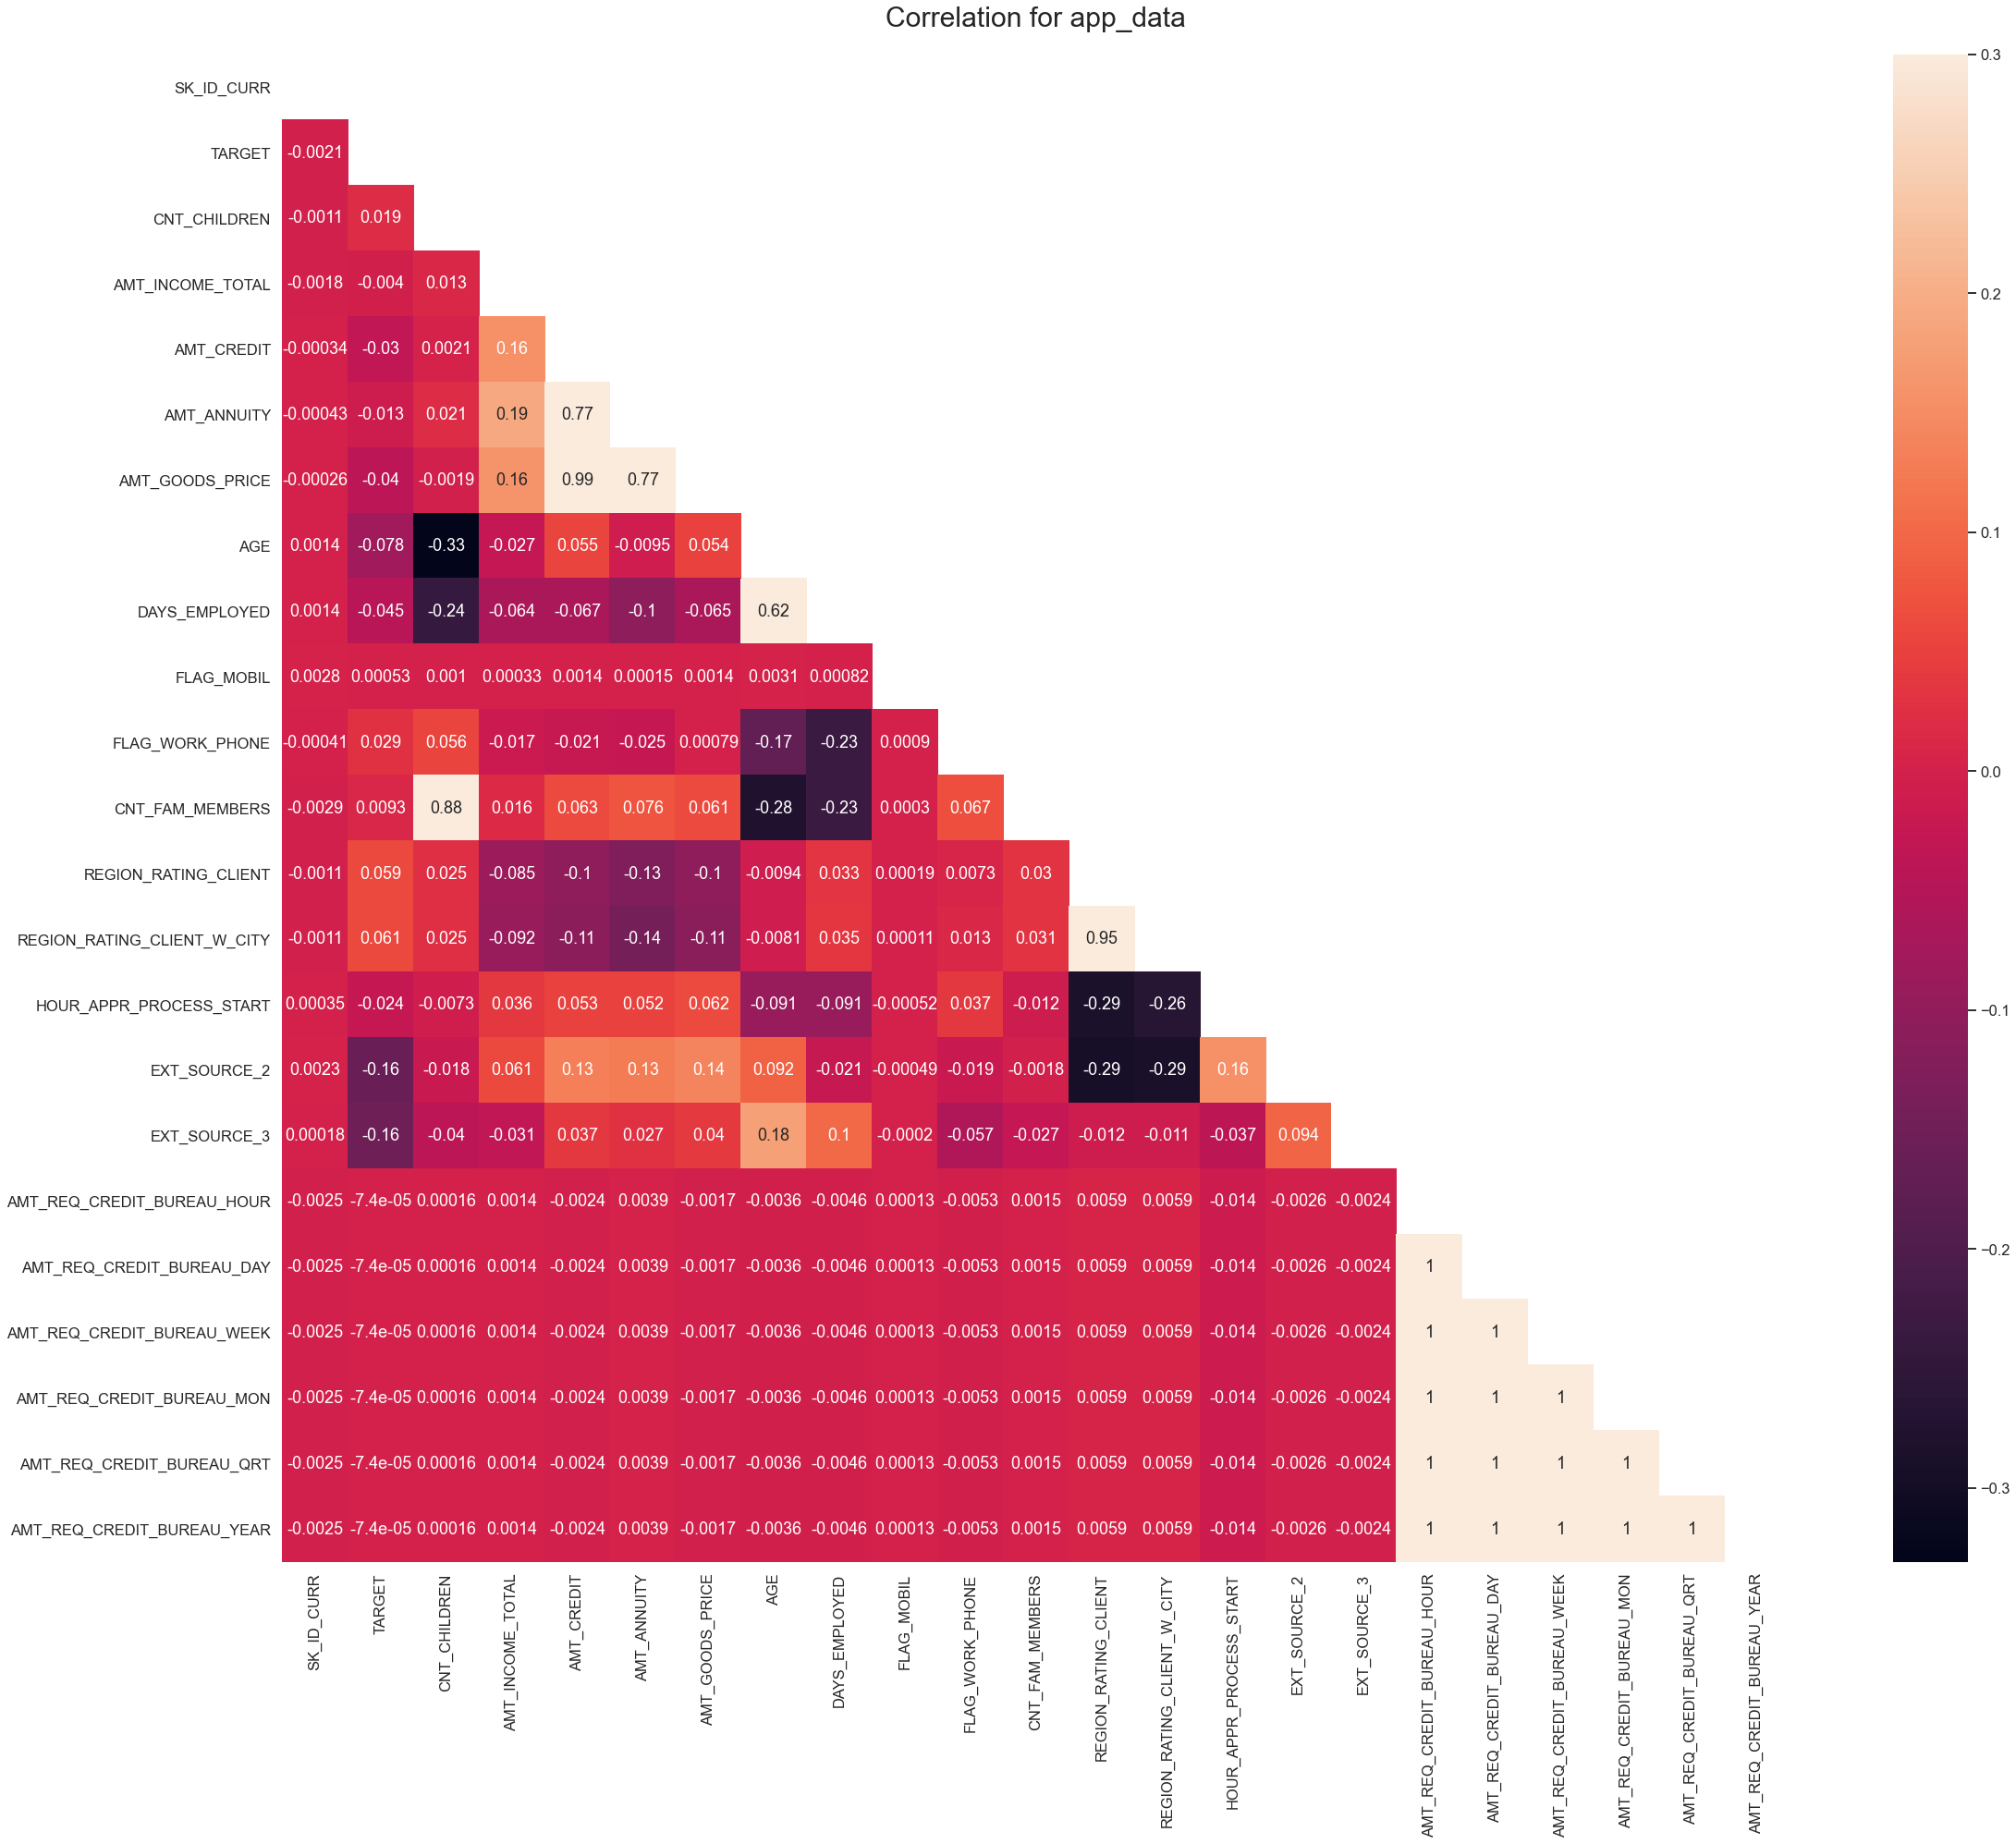

In [65]:

corr = app_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40, 30))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True).set_title('Correlation for app_data',fontsize=30);

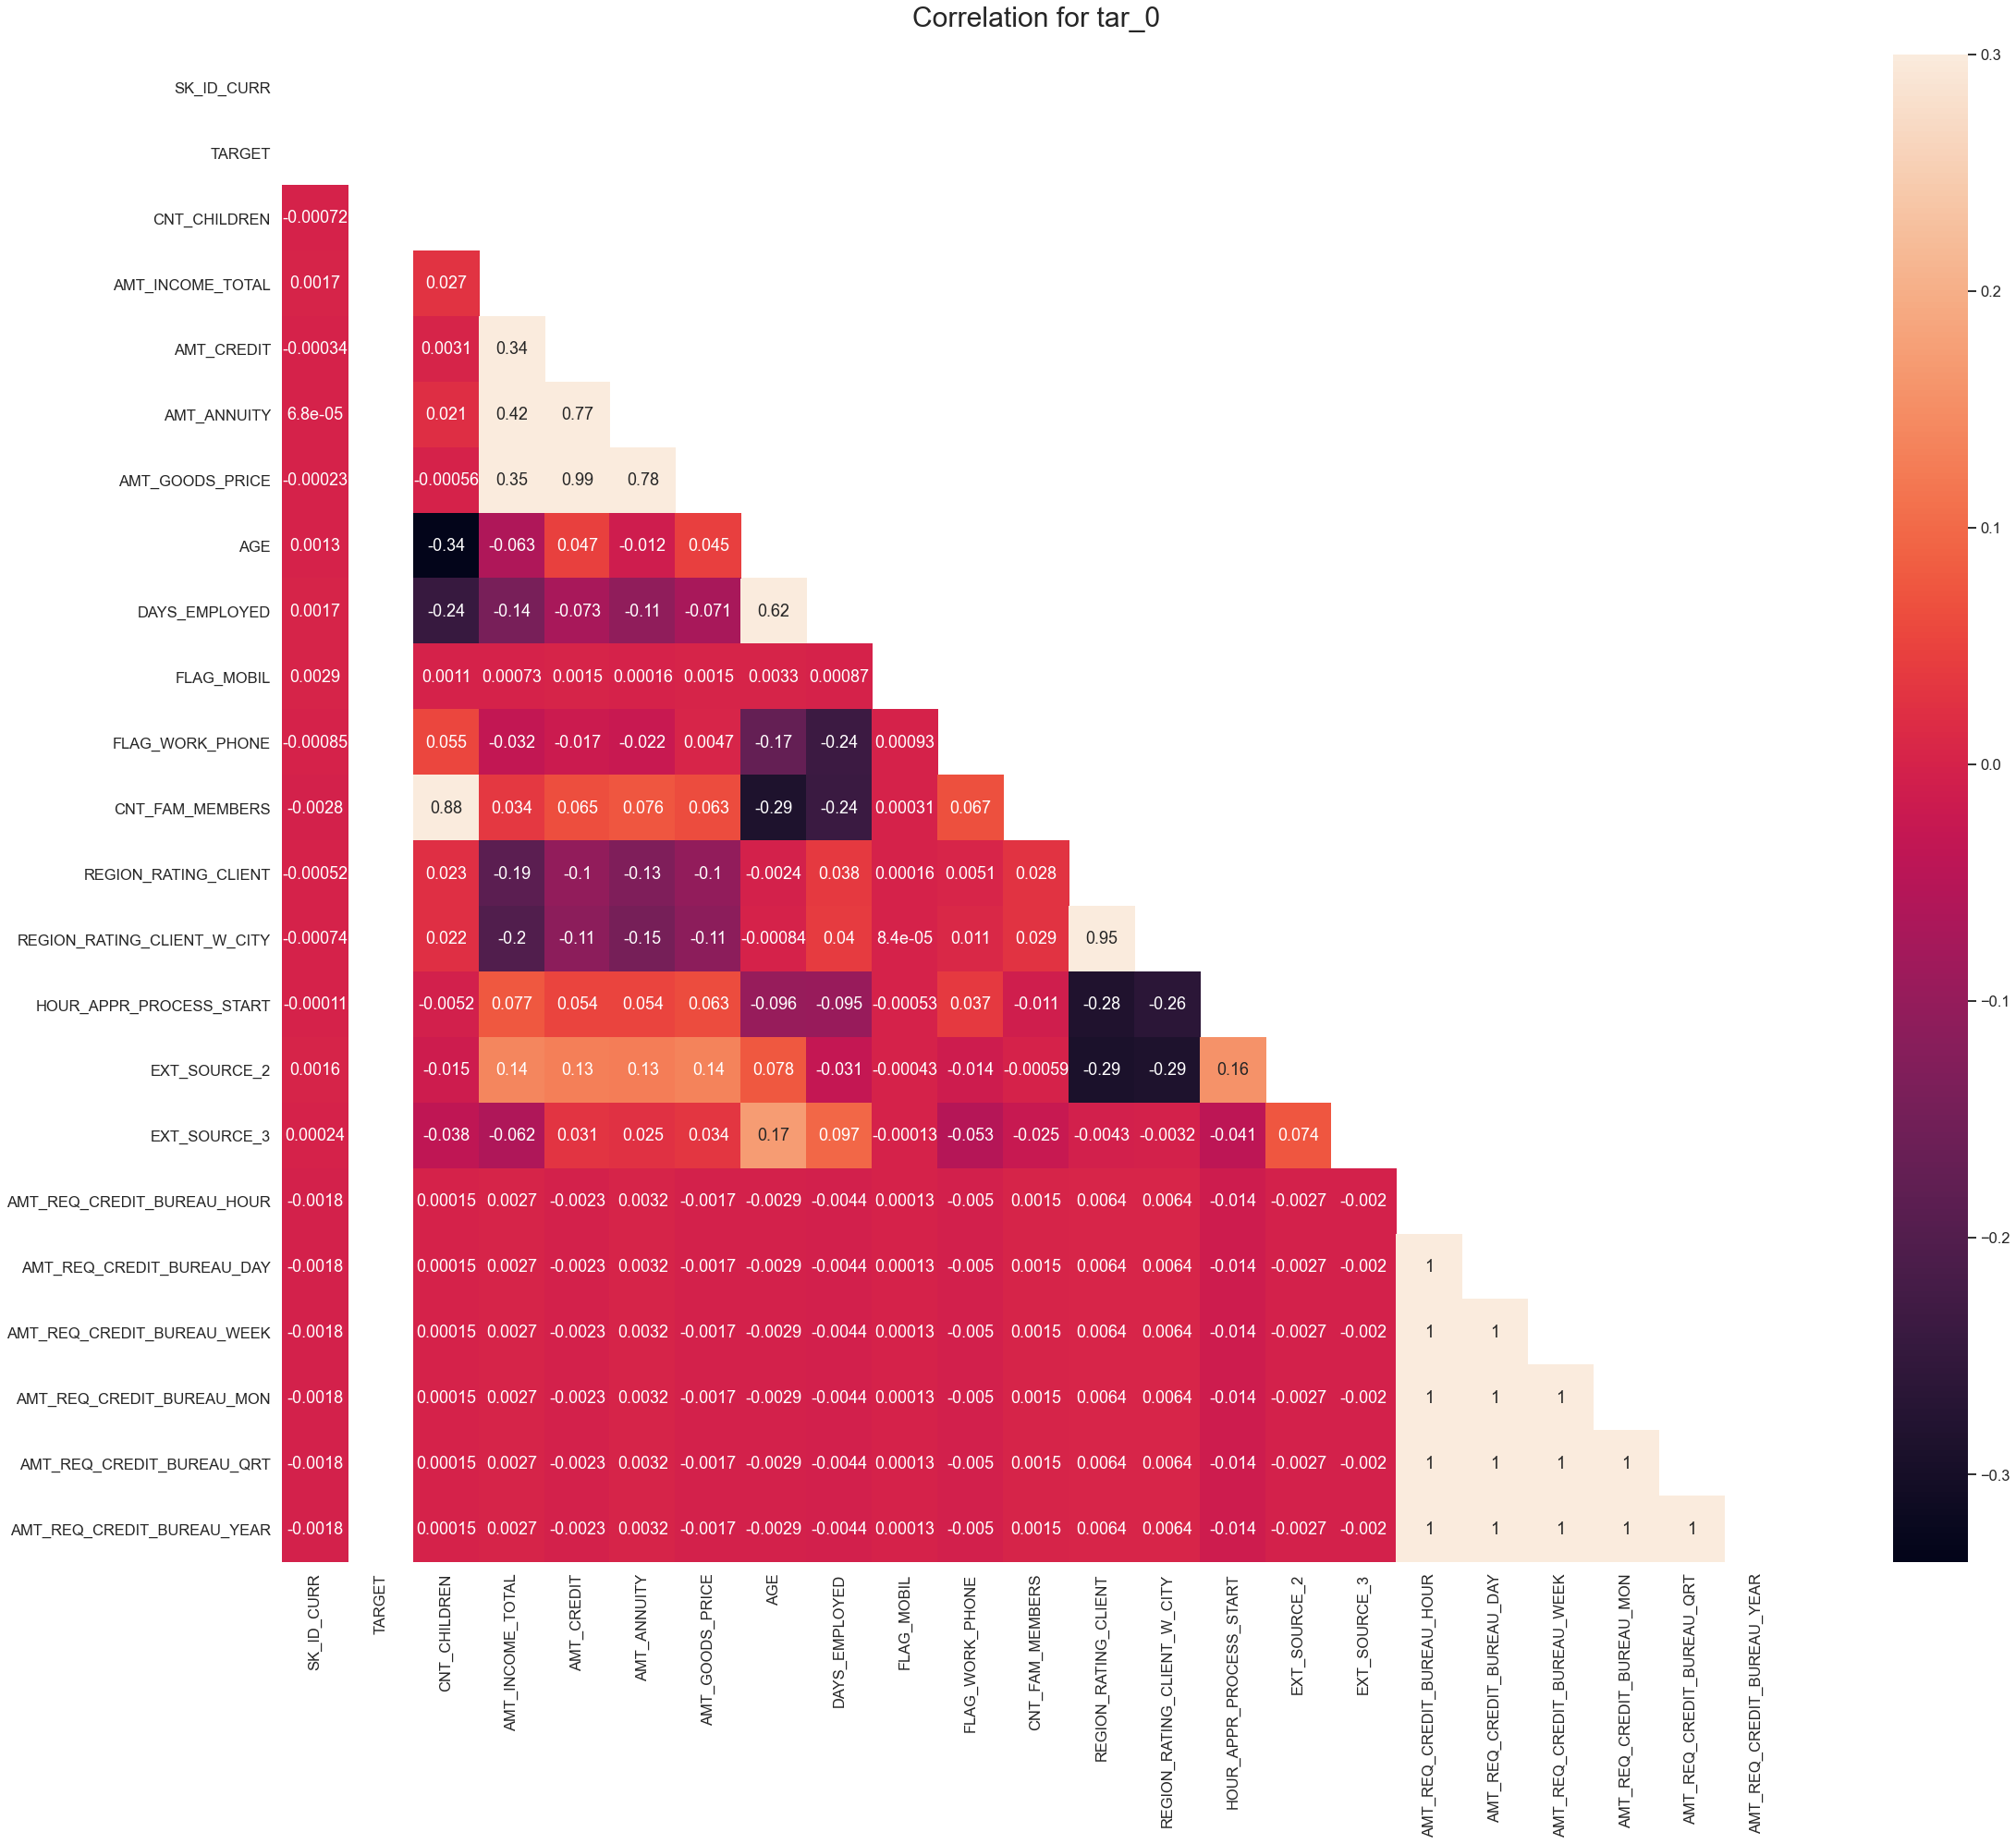

In [66]:
corr = tar_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40, 30))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True).set_title('Correlation for tar_0',fontsize=30);

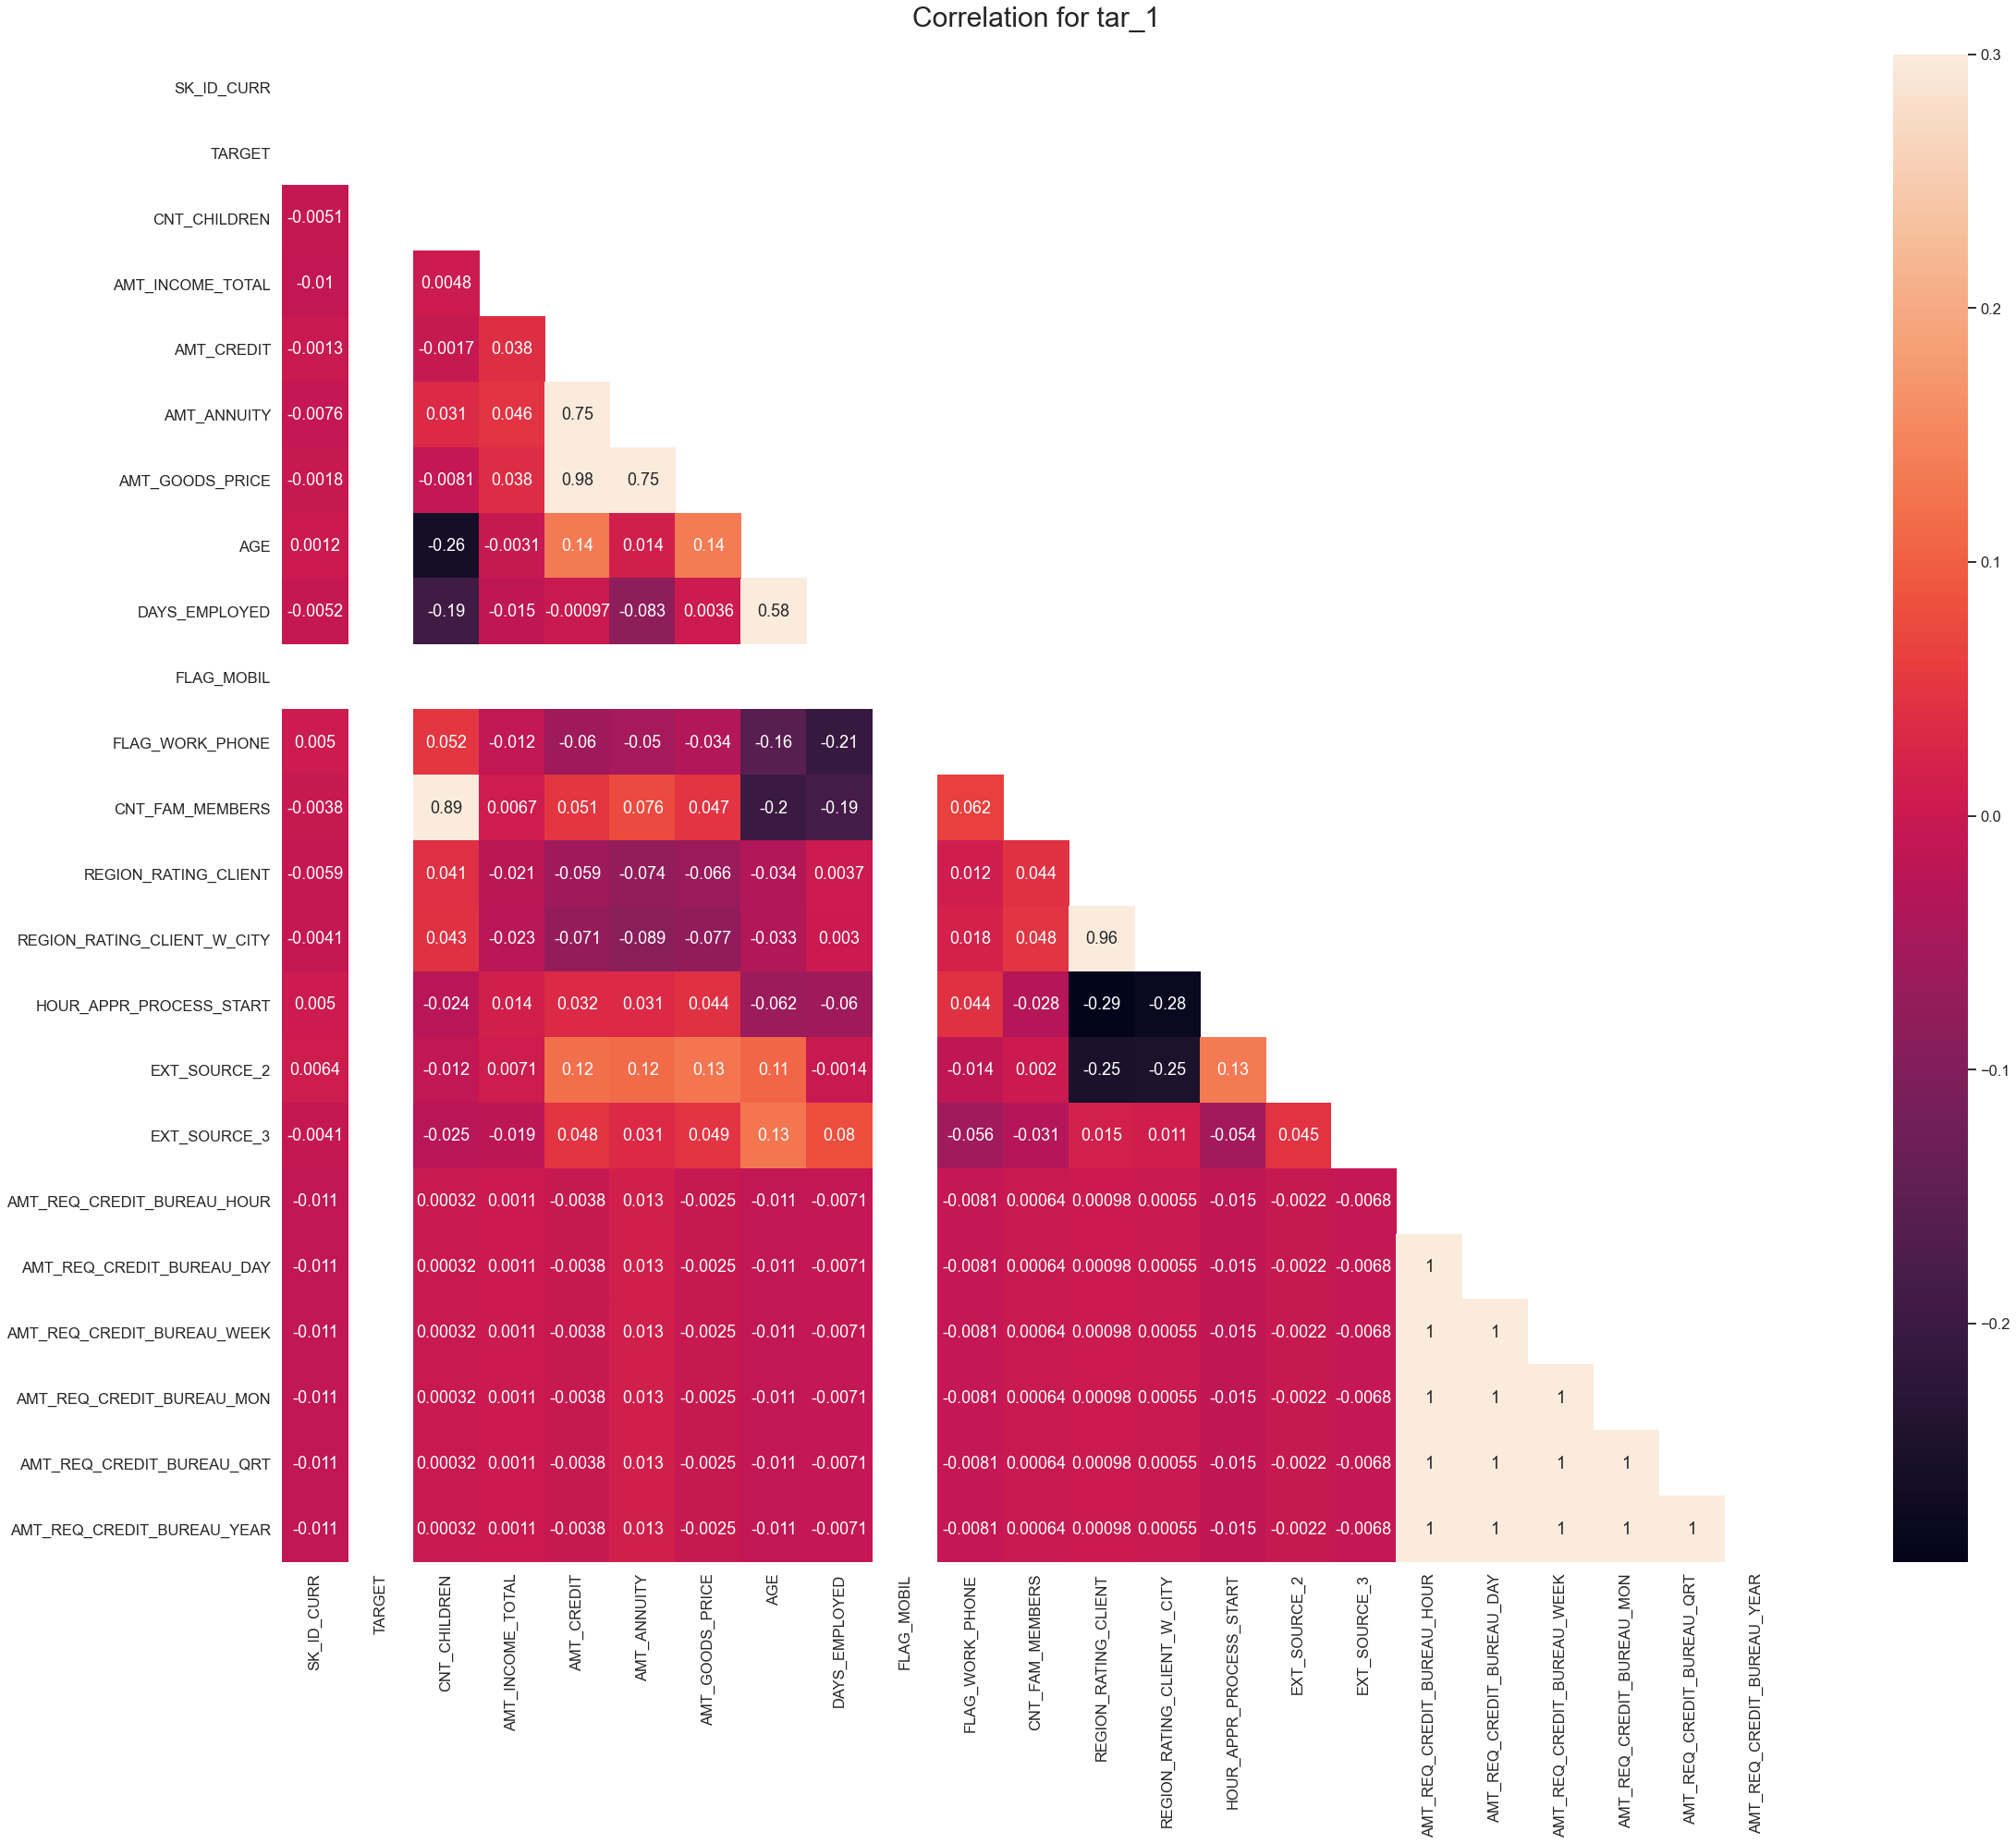

In [67]:
corr = tar_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40, 30))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True).set_title('Correlation for tar_1',fontsize=30);
    

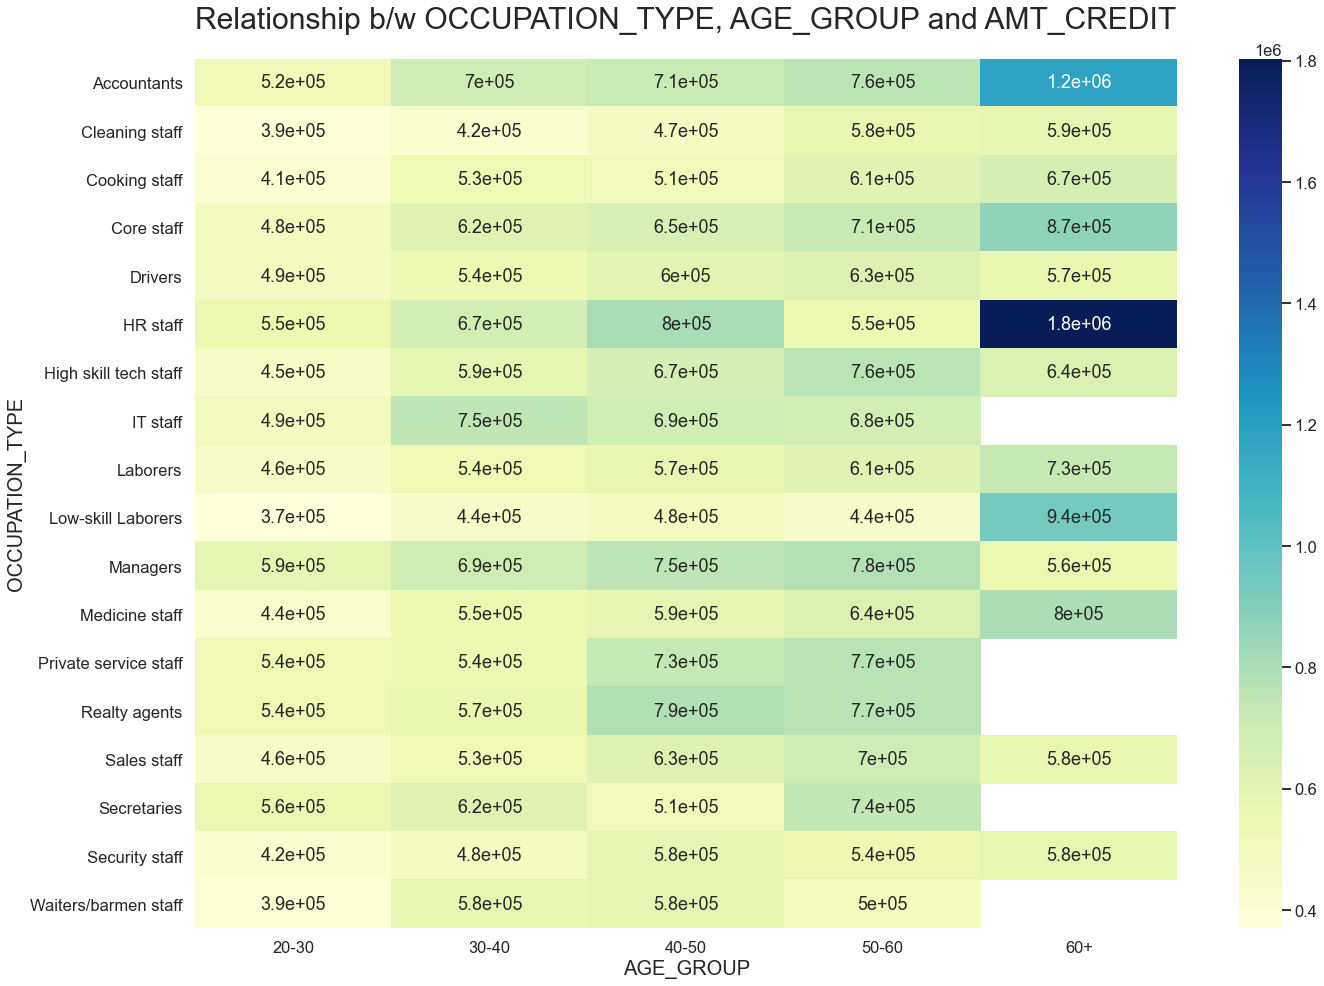

In [68]:
# Let's create a heat map between OCCUPATION_TYPE, AGE_GROUP and AMT_CREDIT for target=1
corr_11 = pd.pivot_table(data = tar_1, index ="OCCUPATION_TYPE" ,columns = "AGE_GROUP", values= "AMT_CREDIT" )
plt.figure(figsize= (22,16))
sns.heatmap(corr_11, cmap = "YlGnBu",annot=True).set_title('Relationship b/w OCCUPATION_TYPE, AGE_GROUP and AMT_CREDIT',fontsize=30)
plt.show()

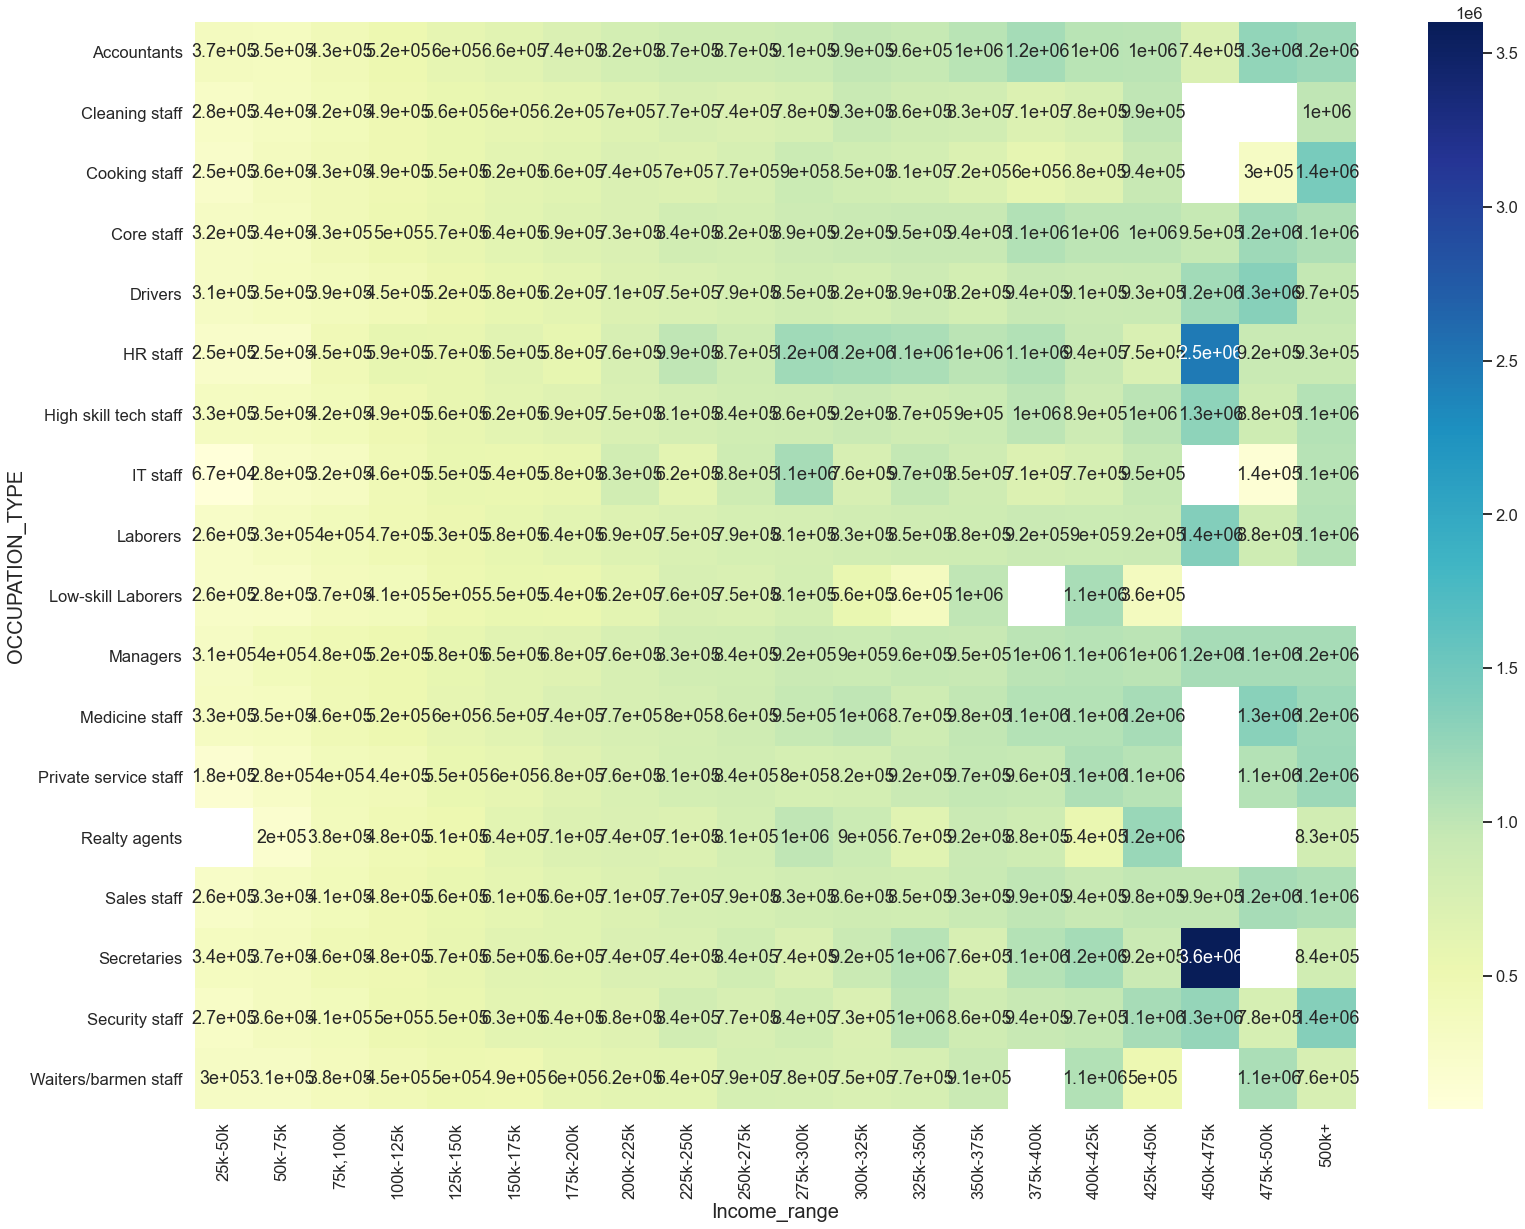

In [69]:
# Let's create a heat map between OCCUPATION_TYPE, Income_range and AMT_CREDIT for target=1
corr_11 = pd.pivot_table(data = tar_0, index ="OCCUPATION_TYPE" ,columns = "Income_range", values= "AMT_CREDIT" )
plt.figure(figsize= (26,20))
sns.heatmap(corr_11, cmap = "YlGnBu",annot=True)
plt.show()

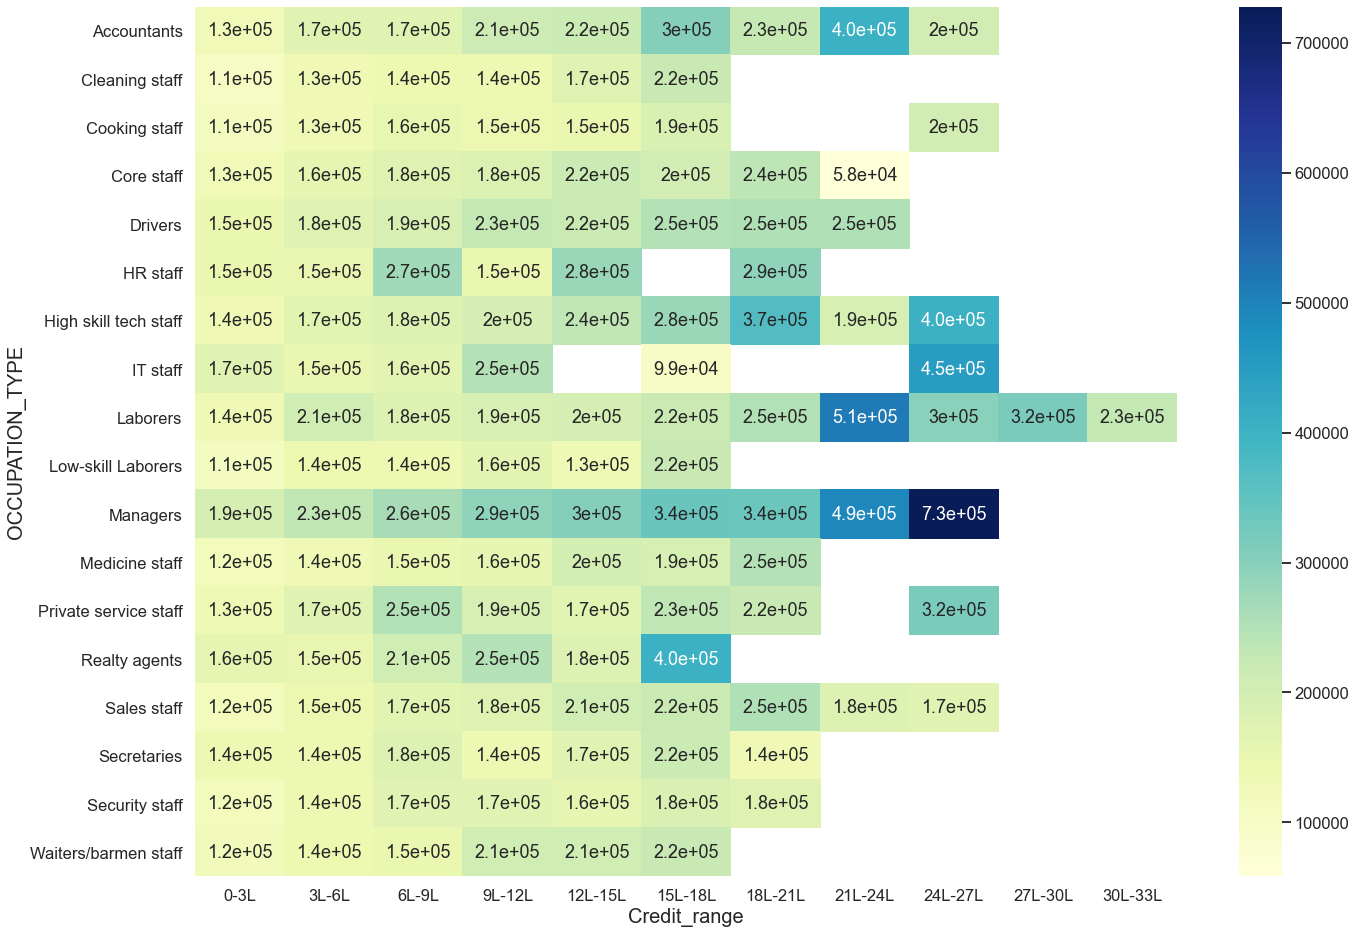

In [70]:
# Let's create a heat map between OCCUPATION_TYPE, Credit_range and AMT_INCOME_TOTAL for target=1
corr_12 = pd.pivot_table(data = tar_1, index ="OCCUPATION_TYPE" ,columns = "Credit_range", values= "AMT_INCOME_TOTAL" )
plt.figure(figsize= (22,16))
sns.heatmap(corr_12, cmap = "YlGnBu",annot=True)
plt.show()

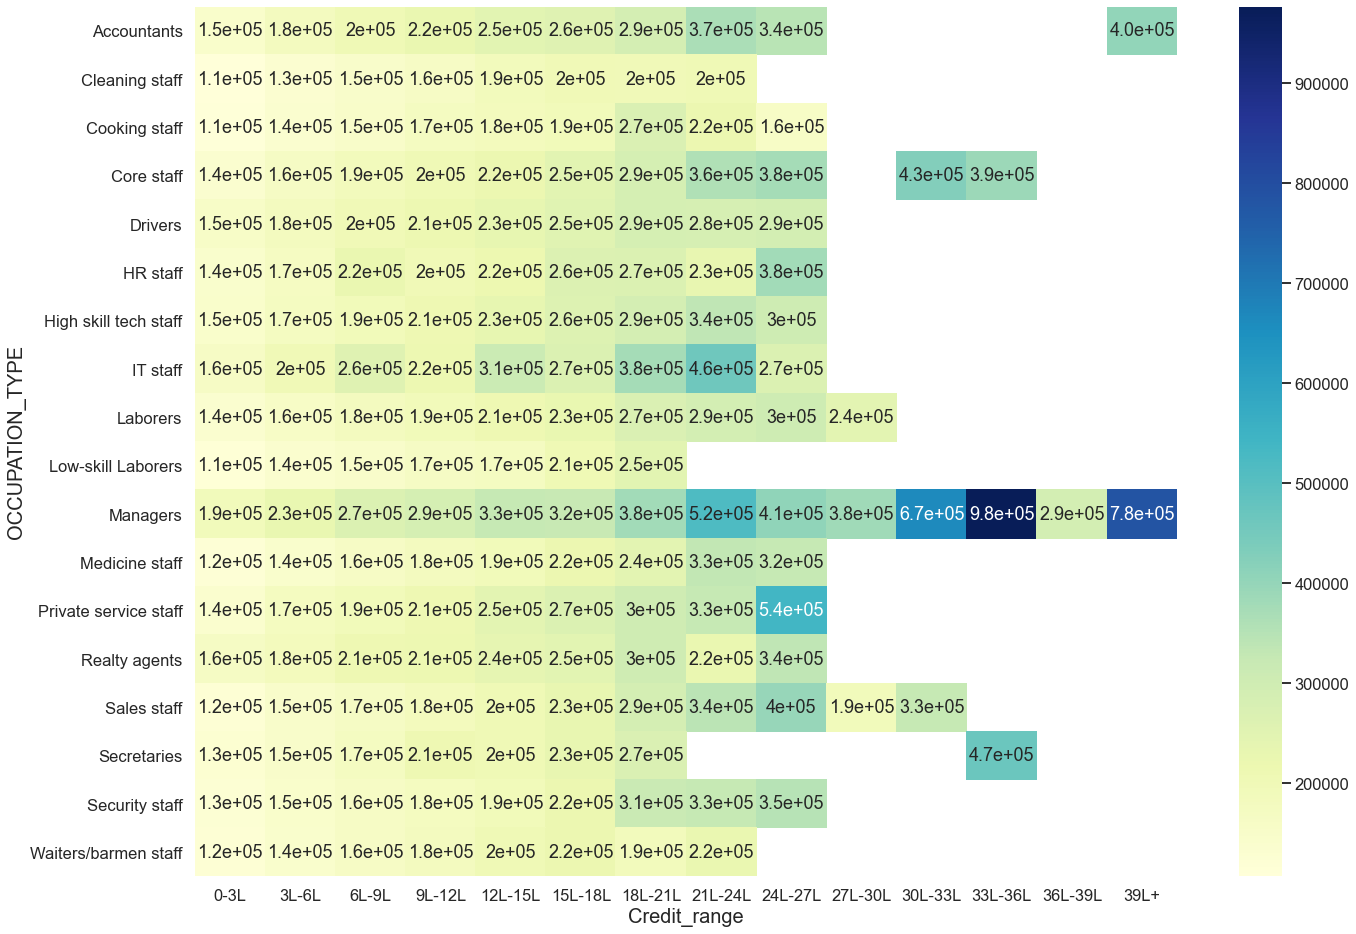

In [71]:
# Let's create a heat map between OCCUPATION_TYPE, Credit_range and AMT_INCOME_TOTAL for target=1
corr_12 = pd.pivot_table(data = tar_0, index ="OCCUPATION_TYPE" ,columns = "Credit_range", values= "AMT_INCOME_TOTAL" )
plt.figure(figsize= (22,16))
sns.heatmap(corr_12, cmap = "YlGnBu",annot=True)
plt.show()

#Previous Application Dataset Analysis
# Reading the dataframe
app_pdata = pd.read_csv('previous_application.csv')

In [72]:
# Loading the dataframe
prev_data = pd.read_csv('previous_application.csv')

In [73]:
# Displaying the first 5 rows of the dataframe

prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [74]:
#Checking the info of the datashape
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [75]:
#checking the Shape of the dataframe
prev_data.shape

(1670214, 37)

In [76]:
# Finding null values in the dataframe in sorted order
prev_data.isnull().sum().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
RATE_DOWN_PAYMENT               895844
AMT_DOWN_PAYMENT                895844
NAME_TYPE_SUITE                 820405
DAYS_TERMINATION                673065
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_FIRST_DRAWING              673065
DAYS_FIRST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_LAST_DUE                   673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

In [77]:
# Checking for the columns having more than 40% of null values
null_vals = prev_data.isnull().sum()
null_vals = null_vals[null_vals.values>(0.40*len(prev_data))]
len(null_vals)

11

In [78]:
# Dropping the columns having more than 40% of null values
prev_data.drop(prev_data.loc[:,list(null_vals.index)],axis=1,inplace=True)

In [79]:
#checking the shape of the data after dropping the columns 
prev_data.shape

(1670214, 26)

In [80]:
# Checking null values after droppping the columns
prev_data.isnull().sum().sort_values(ascending = False)

AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
NAME_CASH_LOAN_PURPOSE              0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_APPLICATION                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CONTRACT_STATUS                0
NAME_YIELD_GROUP                    0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
SK_ID_PREV                          0
dtype: int64

In [81]:
# Finding the percentage of null values for AMT_GOODS_PRICE
prev_data['AMT_GOODS_PRICE'].isnull().sum()/len(prev_data)*100

23.08177275486854

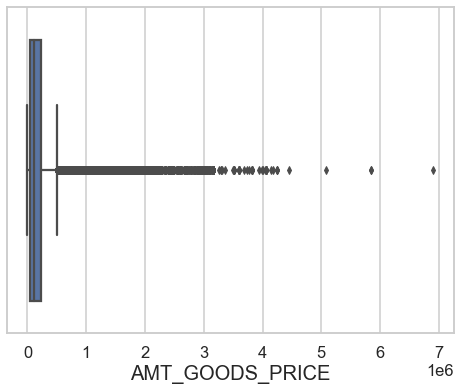

In [82]:
# Plot a boxplot to see if any outliers are present
plt.figure(figsize = (8,6))
sns.boxplot(prev_data['AMT_GOODS_PRICE']);

In [83]:
# Let's describe AMT_GOODS_PRICE
prev_data['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [84]:
# Finding the percentage of null values
prev_data['AMT_ANNUITY'].isnull().sum()/len(prev_data)*100

22.286665062081866

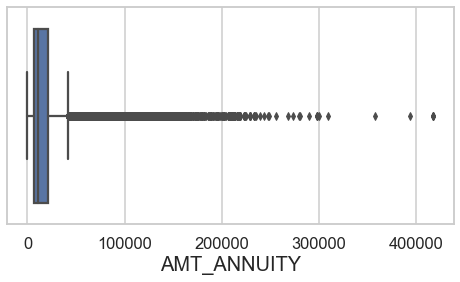

In [85]:
# Plot a boxplot to see if any outliers are present
plt.figure(figsize = (8,4))
sns.boxplot(prev_data['AMT_ANNUITY']);

In [86]:
# Let's describe AMT_GOODS_PRICE
prev_data['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [87]:
prev_data['CNT_PAYMENT'].value_counts().sort_values(ascending=True)

53.0         1
33.0         1
40.0         1
46.0         2
38.0         2
39.0         2
44.0         2
21.0         3
47.0         3
41.0         3
45.0         3
34.0         4
59.0         4
32.0         6
19.0         6
28.0         8
29.0         8
66.0        10
35.0        11
26.0        13
23.0        27
22.0        37
84.0        45
17.0        48
13.0        51
72.0       139
11.0       669
15.0       904
3.0       1100
9.0       1236
7.0       1434
20.0      1805
54.0      2104
5.0       3957
16.0      5710
42.0      7136
14.0      8253
30.0     16924
4.0      26924
8.0      30349
48.0     47316
60.0     53600
36.0     72583
18.0     77430
24.0    137764
10.0    141851
0.0     144985
6.0     190461
12.0    323049
Name: CNT_PAYMENT, dtype: int64

In [88]:
# Finding the percentage of null values
prev_data['CNT_PAYMENT'].isnull().sum()/len(prev_data)*100

22.286365699245724

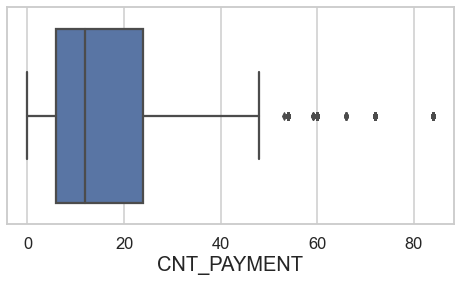

In [89]:
# Plot a boxplot to see if any outliers are present
plt.figure(figsize = (8,4))
sns.boxplot(prev_data['CNT_PAYMENT']);

# Inferences: As we can see 22% missing values can be imputed or neglected
We can use median for imputing null values if required because of the presence of outliers,these are the points which are far away from the normal range of data.
All the outliers found above seems to be valid because term of previous credit at application of the previous application is having a 75th percentile around 2.4 and max value around 8.4, generalizing the term period of a loan, 84 months of period is a valid term which might be for a higher amount of loan.
Let's not delete any outlier and continue our analysis

In [90]:
# Let's describe AMT_GOODS_PRICE
prev_data['PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [91]:
prev_data['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [92]:
# Finding the percentage of null values
prev_data['PRODUCT_COMBINATION'].isnull().sum()/len(prev_data)*100

0.02071590826085759

In [93]:
prev_data['PRODUCT_COMBINATION'].mode()

0    Cash
dtype: object

# Inferences drawn:
Around 0.021% missing values found can be imputed or neglected.
we can fill those missing values with the mode of the column which comes out to be cash

In [94]:
prev_data.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   
5    340573.5         315000.0                   SATURDAY   
6         0.0              NaN                    TUESDAY   
7         0.0              NaN                     MONDAY   
8         0.0              NaN                     MONDAY   
9         0.0              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   
5                       1      Everyday expenses             Approved   
6                       1                    XNA             Canceled   
7                       1                    XNA             Canceled   
8                       1                    XNA             Canceled   
9                       1                    XNA             Canceled   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   
5           -684  Cash through the bank                XAP         Repeater   
6            -14                    XNA                XAP         Repeater   
7            -21                    XNA                XAP         Repeater   
8           -386                    XNA                XAP         Repeater   
9            -57                    XNA                XAP         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash       

In [95]:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

# Univariate Analysis

In [96]:
# Inspect the column NAME_CONTRACT_TYPE
prev_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

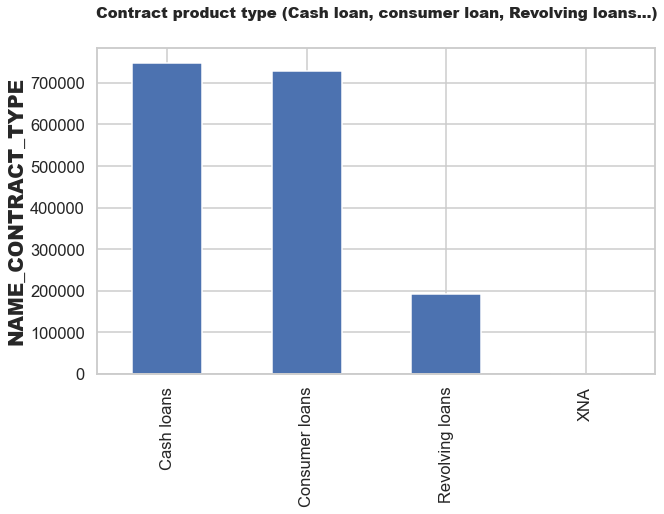

In [97]:
# Let's plot NAME_CONTRACT_TYPE
plt.figure(figsize = (10,6))
p1 = prev_data['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
p1.set_title('Contract product type (Cash loan, consumer loan, Revolving loans...)',fontsize=15,weight='heavy')
plt.ylabel('NAME_CONTRACT_TYPE',fontsize=20,weight='heavy')
plt.show()

In [98]:
# Inspect the column NAME_CONTRACT_STATUS
prev_data['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

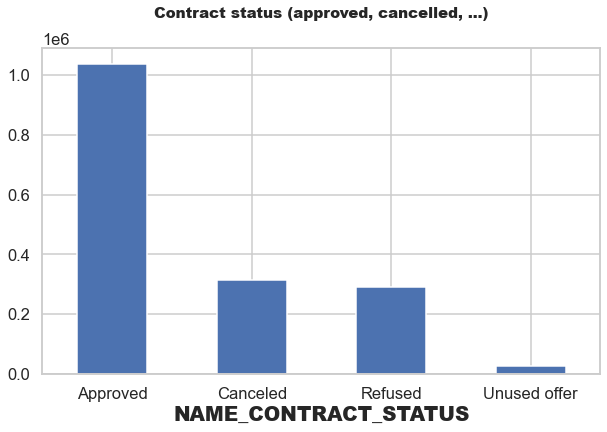

In [99]:
# Let's plot NAME_CONTRACT_STATUS
plt.figure(figsize = (10,6))
p1 = prev_data['NAME_CONTRACT_STATUS'].value_counts().plot.bar()
p1.set_title('Contract status (approved, cancelled, ...)',fontsize=15,weight='heavy')
plt.xlabel('NAME_CONTRACT_STATUS',fontsize=20,weight='heavy')
plt.xticks(rotation=0)
plt.show()

In [100]:
# Let's analyze CODE_REJECT_REASON
prev_data['CODE_REJECT_REASON'].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

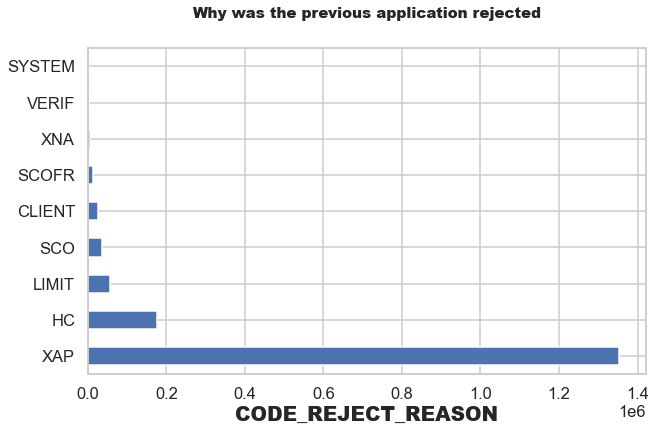

In [101]:
# Let's plot CODE_REJECT_REASON
plt.figure(figsize = (10,6))
p1 = prev_data['CODE_REJECT_REASON'].value_counts().plot.barh()
p1.set_title('Why was the previous application rejected',fontsize=15,weight='heavy')
plt.xlabel('CODE_REJECT_REASON',fontsize=20,weight='heavy')
plt.xticks(rotation=0)
plt.show()

Inferences drawn:
Reason for previous application getting rejected most of the times is XAP.

# Bivariate Analysis

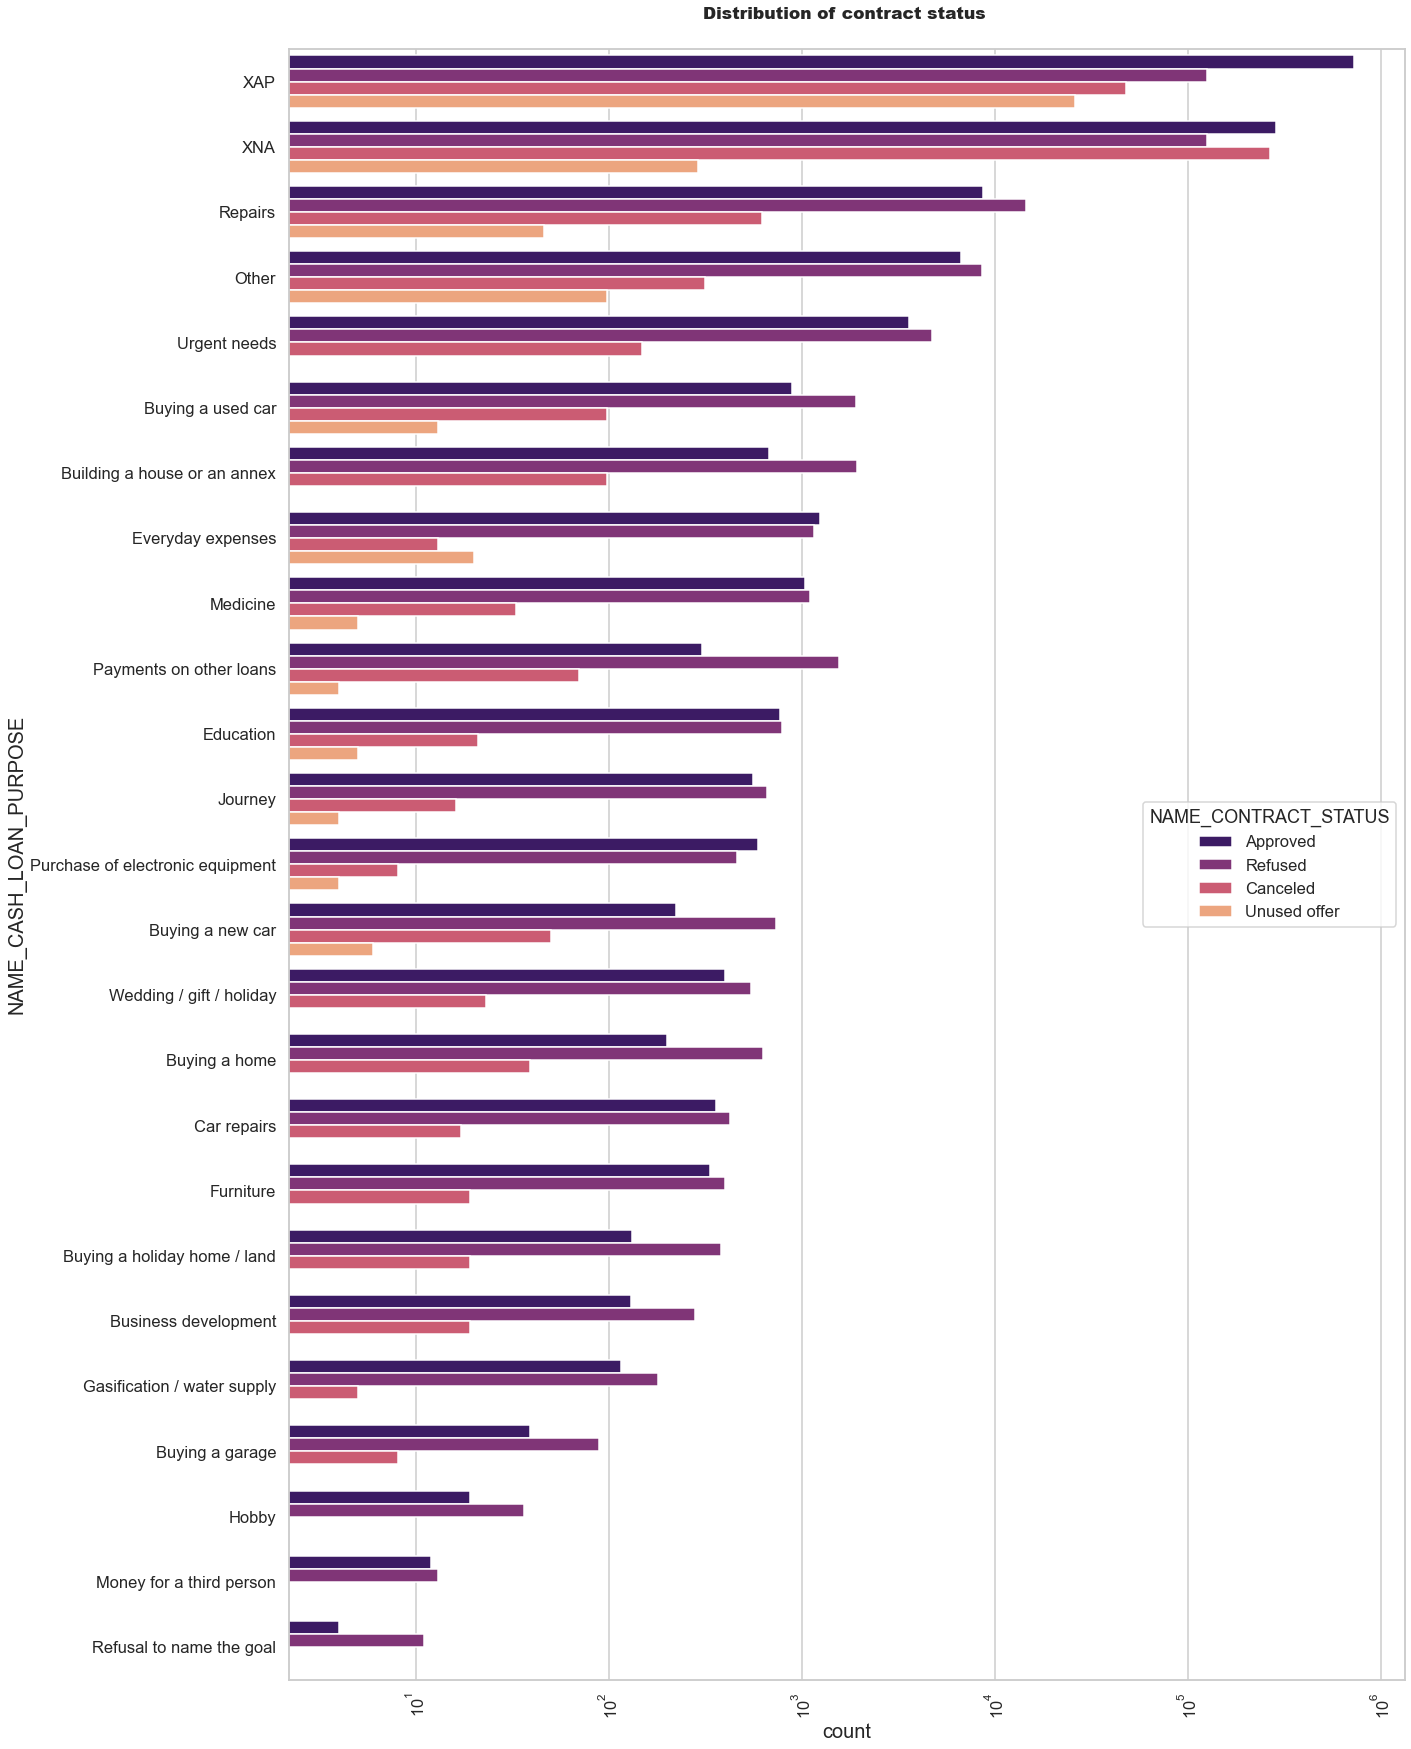

In [102]:
# Distribution of contract status w.r.t. purposes
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status')
ax = sns.countplot(data = prev_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=prev_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                   hue  = 'NAME_CONTRACT_STATUS',palette='magma'
                  ) 
plt.title('Distribution of contract status ',fontsize=17,weight='heavy');

In [103]:
#Checking the shape of the dataframes
print(app_data.shape)
print(prev_data.shape)

(307511, 37)
(1670214, 26)


In [ ]:
# Merging of Previous data with application data on the basis of 'SK_ID_CURR' column
data_both = pd.merge(app_data,prev_data, on='SK_ID_CURR', how='inner',suffixes='_x')
print(data_both.head())

In [ ]:
# Let's check the names of columns in merged dataframe in sorted order
data_both.columns.sort_values()

In [ ]:
# Renaming the columns with suffix '_ and x' to proper values
data_both.rename({'AMT_ANNUITY_':'AMT_ANNUITY', 
                'AMT_ANNUITYx':'AMT_ANNUITY_PREV', 
                'AMT_CREDIT_':'AMT_CREDIT', 
                'AMT_CREDITx':'AMT_CREDIT_PREV',
                'AMT_GOODS_PRICE_':'AMT_GOODS_PRICE', 
                'AMT_GOODS_PRICEx':'AMT_GOODS_PRICE_PREV',
                'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE', 
                'NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV'},
                 axis=1,inplace=True
               ) 

In [ ]:
# Check the column names after renaming
data_both.columns.sort_values()

In [ ]:
# Removing unwanted columns for analysis
data_both.drop(['SK_ID_CURR','HOUR_APPR_PROCESS_STARTx', 
              'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [ ]:
data_both.shape

In [ ]:
# Distribution of contract status w.r.t. Target
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,15))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = data_both, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order= data_both['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                   hue  = 'TARGET',palette='magma'
                  )
plt.title('Distribution of contract status with target',fontsize=17,weight='heavy')

In [ ]:
# Target = 0 into new dataframe, this will be used for non defaulters
data_both_0 = data_both[data_both.TARGET == 0]
data_both_0.head()

In [ ]:
# Target = 1 into new dataframe, this will be used for non defaulters
data_both_1 = data_both[data_both.TARGET == 1]
data_both_1.head()